In [2]:
# SJ with regressors:
#     m.add_regressor('avg_reanalysis')
#     m.add_regressor('avg_ndvi')
#     m.add_regressor('station_avg_temp_c')
#     m.add_regressor('reanalysis_relative_humidity_percent')
# IQ with regressors:
#       m.add_regressor('avg_reanalysis')
#     m.add_regressor('avg_ndvi')

#       m.add_regressor('reanalysis_specific_humidity_g_per_kg')
#       m.add_regressor('station_min_temp_c')

# forecast_sj.to_csv('forecast_sj_200_4_feat_ndvi.csv')
# forecast_iq.to_csv('forecast_iq_200_4_feat_ndvi.csv')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('dengue_features_train.csv')
df_label = pd.read_csv('dengue_labels_train.csv')
data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')

In [6]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [8]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
sj_data = data[data['city'] == 'sj']


In [10]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanal

In [11]:
sj_data['ndvi_se'] = sj_data['ndvi_se'].fillna(method = 'ffill')
sj_data['ndvi_sw'] = sj_data['ndvi_sw'].fillna(method = 'ffill')
sj_data['ndvi_ne'] = sj_data['ndvi_ne'].fillna(method = 'ffill')
sj_data['ndvi_nw'] = sj_data['ndvi_nw'].fillna(method = 'ffill')

In [12]:
sj_data['reanalysis_air_temp_k'] = sj_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_avg_temp_k'] = sj_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_dew_point_temp_k'] =sj_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_max_air_temp_k'] = sj_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_min_air_temp_k'] = sj_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')

In [13]:
sj_data['reanalysis_precip_amt_kg_per_m2'] = sj_data['reanalysis_precip_amt_kg_per_m2'].fillna(method='ffill')
sj_data['reanalysis_relative_humidity_percent'] = sj_data['reanalysis_relative_humidity_percent'].fillna(method='ffill')
sj_data['reanalysis_sat_precip_amt_mm'] = sj_data['reanalysis_sat_precip_amt_mm'].fillna(method='ffill')
sj_data['reanalysis_tdtr_k'] = sj_data['reanalysis_tdtr_k'].fillna(method='ffill')
sj_data['station_avg_temp_c'] = sj_data['station_avg_temp_c'].fillna(method='ffill')
sj_data['station_diur_temp_rng_c'] = sj_data['station_diur_temp_rng_c'].fillna(method='ffill')
sj_data['station_precip_mm'] = sj_data['station_precip_mm'].fillna(method='ffill')




In [14]:
sj_data['avg_reanalysis'] = sj_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

In [15]:
sj_data['avg_ndvi'] = sj_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [16]:
sj_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,296.686000,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,297.581143,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,298.178857,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,298.385143,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,298.880857,0.239235


In [17]:
sj_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

<AxesSubplot:>

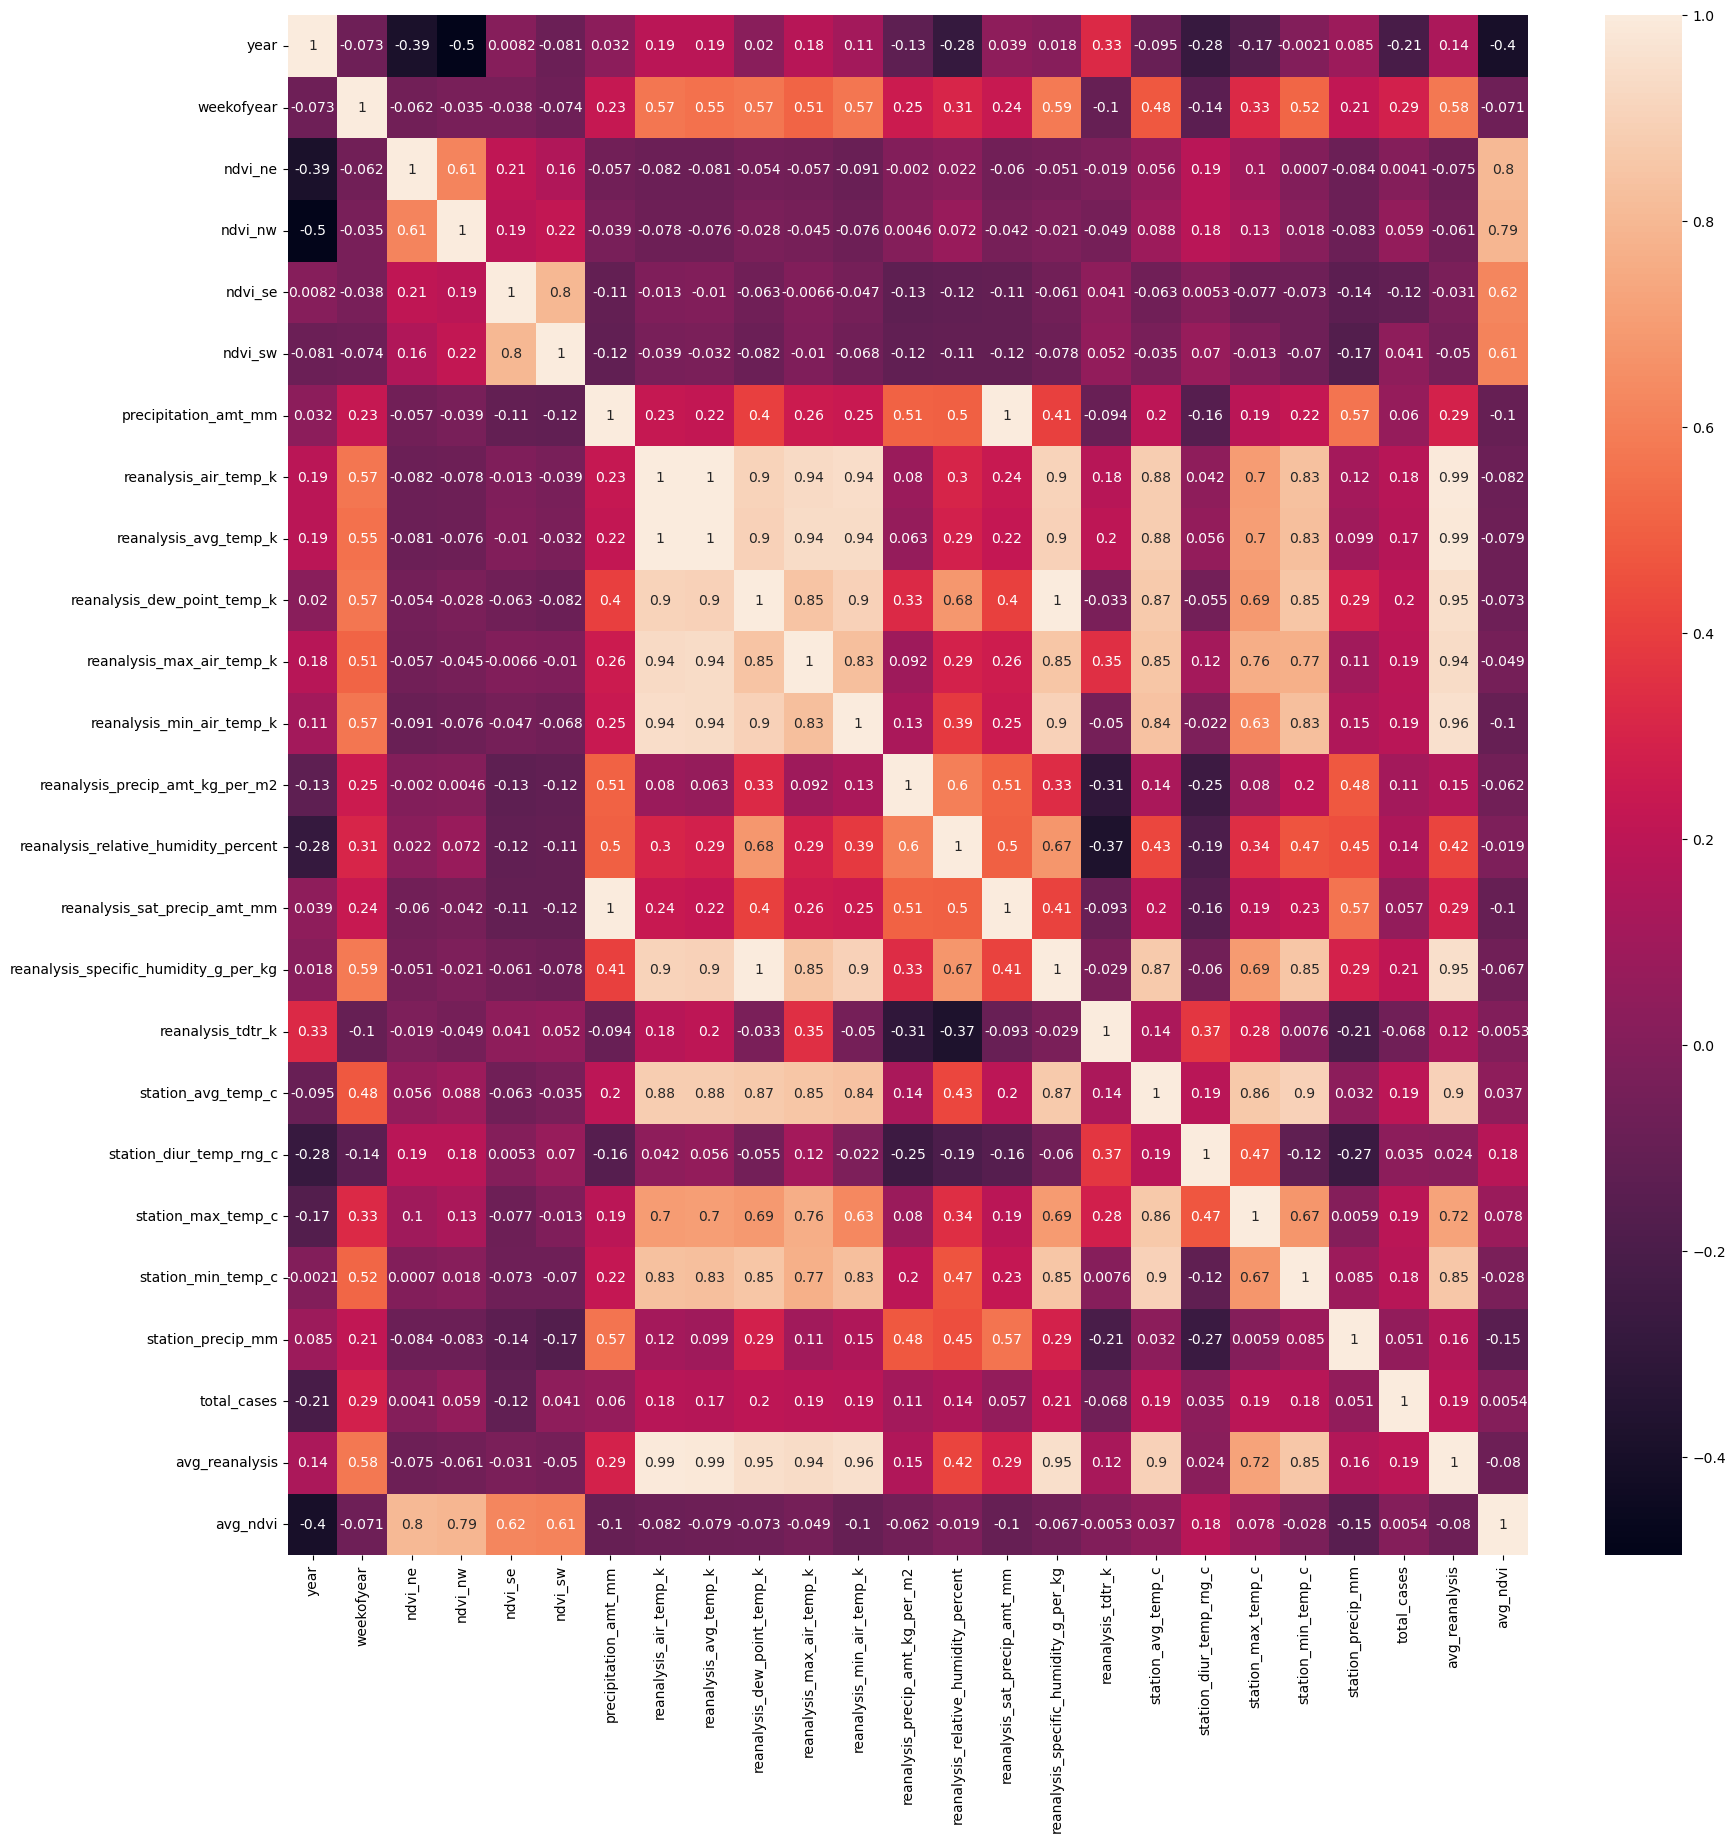

In [18]:
plt.figure(figsize=[20,20])
sns.heatmap(sj_data.corr(),annot=True)

In [19]:
sj_data = sj_data[['week_start_date','total_cases',
                   'avg_reanalysis','station_avg_temp_c','avg_ndvi',
                   'reanalysis_relative_humidity_percent']]

In [20]:
sj_data.head()

,week_start_date,total_cases,avg_reanalysis,station_avg_temp_c,avg_ndvi,reanalysis_relative_humidity_percent
0,1990-04-30,4,296.686000,25.442857,0.150606,73.365714
1,1990-05-07,5,297.581143,26.714286,0.157479,77.368571
2,1990-05-14,4,298.178857,26.714286,0.133315,82.052857
3,1990-05-21,3,298.385143,27.471429,0.209286,80.337143
4,1990-05-28,6,298.880857,28.942857,0.239235,80.460000


In [21]:
# !pip install Prophet

In [22]:
from prophet import Prophet

In [23]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   week_start_date                       936 non-null    object 
 1   total_cases                           936 non-null    int64  
 2   avg_reanalysis                        936 non-null    float64
 3   station_avg_temp_c                    936 non-null    float64
 4   avg_ndvi                              936 non-null    float64
 5   reanalysis_relative_humidity_percent  936 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 51.2+ KB


In [24]:
sj_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [25]:
# m = prophet.Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # future = m.make_future_dataframe(periods = 10)
# # forecast = m.predict(future)




In [26]:
test_df_main = pd.read_csv('dengue_features_test.csv')
test_df = test_df_main[test_df_main['city']=='sj']
test_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [27]:
test_df['ndvi_se'] = test_df['ndvi_se'].fillna(method = 'ffill')
test_df['ndvi_sw'] = test_df['ndvi_sw'].fillna(method = 'ffill')
test_df['ndvi_ne'] = test_df['ndvi_ne'].fillna(method = 'ffill')
test_df['ndvi_nw'] = test_df['ndvi_nw'].fillna(method = 'ffill')

test_df['reanalysis_air_temp_k'] = test_df['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_avg_temp_k'] = test_df['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_dew_point_temp_k'] =test_df['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_max_air_temp_k'] = test_df['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_min_air_temp_k'] = test_df['reanalysis_min_air_temp_k'].fillna(method = 'ffill')




test_df['avg_reanalysis'] = test_df[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df['avg_ndvi'] = test_df[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [28]:
test_df['station_avg_temp_c'] = test_df['station_avg_temp_c'].fillna(method = 'ffill')
test_df['reanalysis_relative_humidity_percent'] = test_df['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')


In [29]:
test_df = test_df[['week_start_date','avg_reanalysis','station_avg_temp_c','avg_ndvi',
                   'reanalysis_relative_humidity_percent']]

In [30]:
# test_df['reanalysis_relative_humidity_percent'] = test_df['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')


In [31]:
test_df.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df.head()


,ds,avg_reanalysis,station_avg_temp_c,avg_ndvi,reanalysis_relative_humidity_percent
0,2008-04-29,297.814000,26.528571,0.039032,78.781429
1,2008-05-06,297.785714,26.071429,0.030989,78.230000
2,2008-05-13,298.544286,27.928571,0.057178,78.270000
3,2008-05-20,298.744286,28.057143,0.057162,73.015714
4,2008-05-27,298.762286,27.614286,0.058704,74.084286


In [32]:
# Set up parameter grid
import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('avg_ndvi')
    m.add_regressor('station_avg_temp_c')
    m.add_regressor('reanalysis_relative_humidity_percent')
    m.fit(sj_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='365.25 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_sj = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_sj.add_regressor('avg_reanalysis')
auto_model_sj.add_regressor('avg_ndvi')
auto_model_sj.add_regressor('station_avg_temp_c')
auto_model_sj.add_regressor('reanalysis_relative_humidity_percent')
auto_model_sj.fit(sj_data)

11:35:26 - cmdstanpy - INFO - Chain [1] start processing
11:35:27 - cmdstanpy - INFO - Chain [1] done processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:32 - cmdstanpy - INFO - Chain [1] start processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing
11:35:33 - cmdstanpy - INFO - Chain [1] done processing
11:35:33 - cmdstanpy - INFO - Chain [1] start processing
11:35:33 - cmdstanpy - INFO - Chain [1

11:35:40 - cmdstanpy - INFO - Chain [1] done processing
11:35:40 - cmdstanpy - INFO - Chain [1] done processing
11:35:40 - cmdstanpy - INFO - Chain [1] done processing
11:35:40 - cmdstanpy - INFO - Chain [1] start processing
11:35:40 - cmdstanpy - INFO - Chain [1] start processing
11:35:40 - cmdstanpy - INFO - Chain [1] done processing
11:35:40 - cmdstanpy - INFO - Chain [1] done processing
11:35:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:35:40 - cmdstanpy - INFO - Chain [1] start processing
11:35:40 - cmdstanpy - INFO - Chain [1] start processing
11:35:40 - cmdstanpy - INFO - Chain [1] done processing
11:35:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:35:40 - cmdstanpy - INFO - Chain [1] start processing
11:35:41 - cmdstanpy - INFO - Chain [1] start processing
11:35:41 - cmd

11:35:47 - cmdstanpy - INFO - Chain [1] start processing
11:35:47 - cmdstanpy - INFO - Chain [1] done processing
11:35:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:35:47 - cmdstanpy - INFO - Chain [1] start processing
11:35:47 - cmdstanpy - INFO - Chain [1] start processing
11:35:47 - cmdstanpy - INFO - Chain [1] done processing
11:35:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:35:47 - cmdstanpy - INFO - Chain [1] start processing
11:35:47 - cmdstanpy - INFO - Chain [1] done processing
11:35:47 - cmdstanpy - INFO - Chain [1] start processing
11:35:47 - cmdstanpy - INFO - Chain [1] done processing
11:35:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:35:47 - cmdstanpy - INFO -

11:35:54 - cmdstanpy - INFO - Chain [1] done processing
11:35:54 - cmdstanpy - INFO - Chain [1] start processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] start processing
11:35:55 - cmdstanpy - INFO - Chain [1] start processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] start processing
11:35:55 - cmdstanpy - INFO - Chain [1] start processing
11:35:55 - cmdstanpy - INFO - Chain [1] start processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:55 - cmdstanpy - INFO - Chain [1] done processing
11:35:56 - cmdstanpy - INFO - Chain [1] start processing
11:35:56 - cmdstanpy - INFO - Chain [1] s

11:36:02 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] done processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] done processing
11:36:03 - cmdstanpy - INFO - Chain [1] done processing
11:36:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:36:03 - cmdstanpy - INFO - Chain [1] done processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] done processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] start processing
11:36:03 - cmdstanpy - INFO - Chain [1] done processi

11:36:17 - cmdstanpy - INFO - Chain [1] done processing
11:36:17 - cmdstanpy - INFO - Chain [1] done processing
11:36:17 - cmdstanpy - INFO - Chain [1] done processing
11:36:17 - cmdstanpy - INFO - Chain [1] done processing
11:36:17 - cmdstanpy - INFO - Chain [1] start processing
11:36:17 - cmdstanpy - INFO - Chain [1] done processing
11:36:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:36:17 - cmdstanpy - INFO - Chain [1] start processing
11:36:18 - cmdstanpy - INFO - Chain [1] done processing
11:36:18 - cmdstanpy - INFO - Chain [1] start processing
11:36:18 - cmdstanpy - INFO - Chain [1] done processing
11:36:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:36:18 - cmdstanpy - INFO - Chain [1] start processing
11:36:18 - cmdstanpy - INFO - Chain [1] start processing
11:36:18 - cmds

11:36:23 - cmdstanpy - INFO - Chain [1] start processing
11:36:23 - cmdstanpy - INFO - Chain [1] done processing
11:36:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:36:23 - cmdstanpy - INFO - Chain [1] start processing
11:36:23 - cmdstanpy - INFO - Chain [1] done processing
11:36:23 - cmdstanpy - INFO - Chain [1] start processing
11:36:23 - cmdstanpy - INFO - Chain [1] done processing
11:36:24 - cmdstanpy - INFO - Chain [1] done processing
11:36:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:36:24 - cmdstanpy - INFO - Chain [1] start processing
11:36:24 - cmdstanpy - INFO - Chain [1] done processing
11:36:24 - cmdstanpy - INFO - Chain [1] done processing
11:36:24 - cmdstanpy - INFO - Chain [1] start processing
11:36:24 - cmdstanpy - INFO - Chain [1] done processing
11:36:24 - cmds

11:36:31 - cmdstanpy - INFO - Chain [1] done processing
11:36:31 - cmdstanpy - INFO - Chain [1] start processing
11:36:31 - cmdstanpy - INFO - Chain [1] done processing
11:36:31 - cmdstanpy - INFO - Chain [1] start processing
11:36:31 - cmdstanpy - INFO - Chain [1] start processing
11:36:31 - cmdstanpy - INFO - Chain [1] done processing
11:36:31 - cmdstanpy - INFO - Chain [1] done processing
11:36:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:36:31 - cmdstanpy - INFO - Chain [1] start processing
11:36:31 - cmdstanpy - INFO - Chain [1] start processing
11:36:31 - cmdstanpy - INFO - Chain [1] done processing
11:36:31 - cmdstanpy - INFO - Chain [1] done processing
11:36:31 - cmdstanpy - INFO - Chain [1] start processing
11:36:32 - cmdstanpy - INFO - Chain [1] done processing
11:36:32 - cmdstanpy - INFO - Chain [1] start processing
11:36:32 - cmdstanpy - INFO - Chain [1] done processing

11:36:39 - cmdstanpy - INFO - Chain [1] start processing
11:36:39 - cmdstanpy - INFO - Chain [1] done processing
11:36:39 - cmdstanpy - INFO - Chain [1] start processing
11:36:39 - cmdstanpy - INFO - Chain [1] start processing
11:36:39 - cmdstanpy - INFO - Chain [1] done processing
11:36:39 - cmdstanpy - INFO - Chain [1] done processing
11:36:39 - cmdstanpy - INFO - Chain [1] done processing
11:36:39 - cmdstanpy - INFO - Chain [1] start processing
11:36:39 - cmdstanpy - INFO - Chain [1] done processing
11:36:40 - cmdstanpy - INFO - Chain [1] start processing
11:36:40 - cmdstanpy - INFO - Chain [1] start processing
11:36:40 - cmdstanpy - INFO - Chain [1] done processing
11:36:40 - cmdstanpy - INFO - Chain [1] start processing
11:36:40 - cmdstanpy - INFO - Chain [1] done processing
11:36:40 - cmdstanpy - INFO - Chain [1] done processing
11:36:40 - cmdstanpy - INFO - Chain [1] start processing
11:36:40 - cmdstanpy - INFO - Chain [1] start processing
11:36:40 - cmdstanpy - INFO - Chain [1]

11:36:47 - cmdstanpy - INFO - Chain [1] done processing
11:36:47 - cmdstanpy - INFO - Chain [1] done processing
11:36:47 - cmdstanpy - INFO - Chain [1] start processing
11:36:48 - cmdstanpy - INFO - Chain [1] start processing
11:36:48 - cmdstanpy - INFO - Chain [1] done processing
11:36:48 - cmdstanpy - INFO - Chain [1] start processing
11:36:48 - cmdstanpy - INFO - Chain [1] done processing
11:36:48 - cmdstanpy - INFO - Chain [1] start processing
11:36:48 - cmdstanpy - INFO - Chain [1] done processing
11:36:48 - cmdstanpy - INFO - Chain [1] start processing
11:36:48 - cmdstanpy - INFO - Chain [1] done processing
11:36:48 - cmdstanpy - INFO - Chain [1] start processing
11:36:48 - cmdstanpy - INFO - Chain [1] start processing
11:36:48 - cmdstanpy - INFO - Chain [1] done processing
11:36:49 - cmdstanpy - INFO - Chain [1] done processing
11:36:49 - cmdstanpy - INFO - Chain [1] done processing
11:36:49 - cmdstanpy - INFO - Chain [1] done processing
11:36:49 - cmdstanpy - INFO - Chain [1] s

11:37:07 - cmdstanpy - INFO - Chain [1] start processing
11:37:07 - cmdstanpy - INFO - Chain [1] start processing
11:37:07 - cmdstanpy - INFO - Chain [1] done processing
11:37:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
11:37:07 - cmdstanpy - INFO - Chain [1] done processing
11:37:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
11:37:07 - cmdstanpy - INFO - Chain [1] start processing
11:37:07 - cmdstanpy - INFO - Chain [1] done processing
11:37:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:07 - cmdstanpy - INFO - Chain [1] start processing
11:37:07 - cmdstanpy - INFO - Chain [1] start processing
11:37:08 - cmdstanpy - INFO - Chain [1] done processing
11:37:09 - cmdstanpy - INFO -

11:37:17 - cmdstanpy - INFO - Chain [1] start processing
11:37:17 - cmdstanpy - INFO - Chain [1] done processing
11:37:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:17 - cmdstanpy - INFO - Chain [1] start processing
11:37:17 - cmdstanpy - INFO - Chain [1] done processing
11:37:17 - cmdstanpy - INFO - Chain [1] done processing
11:37:17 - cmdstanpy - INFO - Chain [1] done processing
11:37:18 - cmdstanpy - INFO - Chain [1] start processing
11:37:18 - cmdstanpy - INFO - Chain [1] start processing
11:37:19 - cmdstanpy - INFO - Chain [1] done processing
11:37:19 - cmdstanpy - INFO - Chain [1] done processing
11:37:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:19 - cmdstanpy - INFO - Chain [1] done processing
11:37:19 - cmdstanpy - ERROR - Chain [1] error: error during processing 

11:37:28 - cmdstanpy - INFO - Chain [1] start processing
11:37:28 - cmdstanpy - INFO - Chain [1] done processing
11:37:29 - cmdstanpy - INFO - Chain [1] start processing
11:37:29 - cmdstanpy - INFO - Chain [1] start processing
11:37:29 - cmdstanpy - INFO - Chain [1] done processing
11:37:29 - cmdstanpy - INFO - Chain [1] done processing
11:37:29 - cmdstanpy - INFO - Chain [1] start processing
11:37:29 - cmdstanpy - INFO - Chain [1] done processing
11:37:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:29 - cmdstanpy - INFO - Chain [1] start processing
11:37:29 - cmdstanpy - INFO - Chain [1] start processing
11:37:29 - cmdstanpy - INFO - Chain [1] done processing
11:37:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:29 - cmdstanpy - INFO - Chain [1] start processing
11:37:29 - cm

11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] done processing
11:37:37 - cmdstanpy - INFO - Chain [1] start processing
11:37:38 - cmdstanpy - INFO - Chain [1]

11:37:52 - cmdstanpy - INFO - Chain [1] start processing
11:37:52 - cmdstanpy - INFO - Chain [1] start processing
11:37:52 - cmdstanpy - INFO - Chain [1] done processing
11:37:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:52 - cmdstanpy - INFO - Chain [1] start processing
11:37:52 - cmdstanpy - INFO - Chain [1] start processing
11:37:52 - cmdstanpy - INFO - Chain [1] done processing
11:37:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:52 - cmdstanpy - INFO - Chain [1] start processing
11:37:52 - cmdstanpy - INFO - Chain [1] done processing
11:37:52 - cmdstanpy - INFO - Chain [1] done processing
11:37:52 - cmdstanpy - INFO - Chain [1] start processing
11:37:52 - cmdstanpy - INFO - Chain [1] done processing
11:37:52 - cmdstanpy - ERROR - Chain [1] error: error during processin

11:37:58 - cmdstanpy - INFO - Chain [1] start processing
11:37:58 - cmdstanpy - INFO - Chain [1] done processing
11:37:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:58 - cmdstanpy - INFO - Chain [1] start processing
11:37:58 - cmdstanpy - INFO - Chain [1] done processing
11:37:58 - cmdstanpy - INFO - Chain [1] done processing
11:37:59 - cmdstanpy - INFO - Chain [1] done processing
11:37:59 - cmdstanpy - INFO - Chain [1] done processing
11:37:59 - cmdstanpy - INFO - Chain [1] start processing
11:37:59 - cmdstanpy - INFO - Chain [1] done processing
11:37:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:37:59 - cmdstanpy - INFO - Chain [1] start processing
11:37:59 - cmdstanpy - INFO - Chain [1] done processing
11:37:59 - cmdstanpy - INFO - Chain [1] start processing
11:37:59 - cmds

11:38:06 - cmdstanpy - INFO - Chain [1] start processing
11:38:06 - cmdstanpy - INFO - Chain [1] start processing
11:38:06 - cmdstanpy - INFO - Chain [1] done processing
11:38:06 - cmdstanpy - INFO - Chain [1] done processing
11:38:06 - cmdstanpy - INFO - Chain [1] done processing
11:38:06 - cmdstanpy - INFO - Chain [1] start processing
11:38:07 - cmdstanpy - INFO - Chain [1] done processing
11:38:07 - cmdstanpy - INFO - Chain [1] done processing
11:38:07 - cmdstanpy - INFO - Chain [1] start processing
11:38:07 - cmdstanpy - INFO - Chain [1] start processing
11:38:07 - cmdstanpy - INFO - Chain [1] done processing
11:38:07 - cmdstanpy - INFO - Chain [1] done processing
11:38:07 - cmdstanpy - INFO - Chain [1] start processing
11:38:07 - cmdstanpy - INFO - Chain [1] start processing
11:38:07 - cmdstanpy - INFO - Chain [1] done processing
11:38:07 - cmdstanpy - INFO - Chain [1] done processing
11:38:07 - cmdstanpy - INFO - Chain [1] done processing
11:38:07 - cmdstanpy - INFO - Chain [1] s

11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing
11:38:16 - cmdstanpy - INFO - Chain [1] 

11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing
11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing
11:38:24 - cmdstanpy - INFO - Chain [1] start processing
11:38:25 - cmdstanpy - INFO - Chain [1] start processing
11:38:25 - cmdstanpy - INFO - Chain [1] done processing
11:38:25 - cmdstanpy - INFO - Chain [1]

11:38:39 - cmdstanpy - INFO - Chain [1] done processing
11:38:39 - cmdstanpy - INFO - Chain [1] done processing
11:38:39 - cmdstanpy - INFO - Chain [1] done processing
11:38:39 - cmdstanpy - INFO - Chain [1] start processing
11:38:39 - cmdstanpy - INFO - Chain [1] done processing
11:38:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:38:39 - cmdstanpy - INFO - Chain [1] start processing
11:38:40 - cmdstanpy - INFO - Chain [1] done processing
11:38:40 - cmdstanpy - INFO - Chain [1] done processing
11:38:40 - cmdstanpy - INFO - Chain [1] start processing
11:38:40 - cmdstanpy - INFO - Chain [1] start processing
11:38:40 - cmdstanpy - INFO - Chain [1] done processing
11:38:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:38:40 - cmdstanpy - INFO - Chain [1] done processing
11:38:40 - cmdst

11:38:45 - cmdstanpy - INFO - Chain [1] done processing
11:38:45 - cmdstanpy - INFO - Chain [1] start processing
11:38:45 - cmdstanpy - INFO - Chain [1] start processing
11:38:46 - cmdstanpy - INFO - Chain [1] done processing
11:38:46 - cmdstanpy - INFO - Chain [1] done processing
11:38:46 - cmdstanpy - INFO - Chain [1] done processing
11:38:46 - cmdstanpy - INFO - Chain [1] start processing
11:38:46 - cmdstanpy - INFO - Chain [1] done processing
11:38:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:38:46 - cmdstanpy - INFO - Chain [1] start processing
11:38:46 - cmdstanpy - INFO - Chain [1] done processing
11:38:46 - cmdstanpy - INFO - Chain [1] start processing
11:38:46 - cmdstanpy - INFO - Chain [1] done processing
11:38:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:38:46 - cmds

11:38:52 - cmdstanpy - INFO - Chain [1] start processing
11:38:52 - cmdstanpy - INFO - Chain [1] start processing
11:38:53 - cmdstanpy - INFO - Chain [1] done processing
11:38:53 - cmdstanpy - INFO - Chain [1] done processing
11:38:53 - cmdstanpy - INFO - Chain [1] start processing
11:38:53 - cmdstanpy - INFO - Chain [1] start processing
11:38:53 - cmdstanpy - INFO - Chain [1] start processing
11:38:53 - cmdstanpy - INFO - Chain [1] done processing
11:38:53 - cmdstanpy - INFO - Chain [1] done processing
11:38:53 - cmdstanpy - INFO - Chain [1] done processing
11:38:53 - cmdstanpy - INFO - Chain [1] start processing
11:38:53 - cmdstanpy - INFO - Chain [1] start processing
11:38:53 - cmdstanpy - INFO - Chain [1] done processing
11:38:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:38:53 - cmdstanpy - INFO - Chain [1] done processing
11:38:53 - cmdstanpy - ERROR - Chain [1] error: error d

11:39:01 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] start processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] done processing
11:39:02 - cmdstanpy - INFO - Chain [1] 

11:39:16 - cmdstanpy - INFO - Chain [1] start processing
11:39:16 - cmdstanpy - INFO - Chain [1] done processing
11:39:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:16 - cmdstanpy - INFO - Chain [1] start processing
11:39:16 - cmdstanpy - INFO - Chain [1] start processing
11:39:16 - cmdstanpy - INFO - Chain [1] done processing
11:39:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:16 - cmdstanpy - INFO - Chain [1] start processing
11:39:16 - cmdstanpy - INFO - Chain [1] done processing
11:39:16 - cmdstanpy - INFO - Chain [1] done processing
11:39:16 - cmdstanpy - INFO - Chain [1] done processing
11:39:17 - cmdstanpy - INFO - Chain [1] done processing
11:39:17 - cmdstanpy - INFO - Chain [1] start processing
11:39:17 - cmdstanpy - INFO - Chain [1] done processing
11:39:17 - cmds

11:39:22 - cmdstanpy - INFO - Chain [1] start processing
11:39:22 - cmdstanpy - INFO - Chain [1] start processing
11:39:22 - cmdstanpy - INFO - Chain [1] done processing
11:39:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:22 - cmdstanpy - INFO - Chain [1] start processing
11:39:22 - cmdstanpy - INFO - Chain [1] done processing
11:39:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:22 - cmdstanpy - INFO - Chain [1] start processing
11:39:22 - cmdstanpy - INFO - Chain [1] start processing
11:39:22 - cmdstanpy - INFO - Chain [1] done processing
11:39:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:23 - cmdstanpy - INFO - Chain [1] start processing
11:39:23 - cmdstanpy - INFO 

11:39:29 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
11:39:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:30 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
11:39:30 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
11:39:30 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
11:39:30 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] start processin

11:39:37 - cmdstanpy - INFO - Chain [1] done processing
11:39:37 - cmdstanpy - INFO - Chain [1] start processing
11:39:37 - cmdstanpy - INFO - Chain [1] start processing
11:39:37 - cmdstanpy - INFO - Chain [1] done processing
11:39:37 - cmdstanpy - INFO - Chain [1] done processing
11:39:37 - cmdstanpy - INFO - Chain [1] start processing
11:39:38 - cmdstanpy - INFO - Chain [1] done processing
11:39:38 - cmdstanpy - INFO - Chain [1] start processing
11:39:38 - cmdstanpy - INFO - Chain [1] start processing
11:39:38 - cmdstanpy - INFO - Chain [1] start processing
11:39:38 - cmdstanpy - INFO - Chain [1] start processing
11:39:38 - cmdstanpy - INFO - Chain [1] done processing
11:39:38 - cmdstanpy - INFO - Chain [1] done processing
11:39:38 - cmdstanpy - INFO - Chain [1] done processing
11:39:38 - cmdstanpy - INFO - Chain [1] done processing
11:39:38 - cmdstanpy - INFO - Chain [1] start processing
11:39:38 - cmdstanpy - INFO - Chain [1] done processing
11:39:38 - cmdstanpy - INFO - Chain [1] 

11:39:45 - cmdstanpy - INFO - Chain [1] start processing
11:39:45 - cmdstanpy - INFO - Chain [1] start processing
11:39:45 - cmdstanpy - INFO - Chain [1] done processing
11:39:45 - cmdstanpy - INFO - Chain [1] start processing
11:39:45 - cmdstanpy - INFO - Chain [1] start processing
11:39:45 - cmdstanpy - INFO - Chain [1] done processing
11:39:45 - cmdstanpy - INFO - Chain [1] start processing
11:39:45 - cmdstanpy - INFO - Chain [1] done processing
11:39:45 - cmdstanpy - INFO - Chain [1] done processing
11:39:45 - cmdstanpy - INFO - Chain [1] done processing
11:39:45 - cmdstanpy - INFO - Chain [1] done processing
11:39:46 - cmdstanpy - INFO - Chain [1] start processing
11:39:46 - cmdstanpy - INFO - Chain [1] start processing
11:39:46 - cmdstanpy - INFO - Chain [1] done processing
11:39:46 - cmdstanpy - INFO - Chain [1] done processing
11:39:46 - cmdstanpy - INFO - Chain [1] start processing
11:39:46 - cmdstanpy - INFO - Chain [1] start processing
11:39:46 - cmdstanpy - INFO - Chain [1]

11:39:58 - cmdstanpy - INFO - Chain [1] done processing
11:39:58 - cmdstanpy - INFO - Chain [1] start processing
11:39:58 - cmdstanpy - INFO - Chain [1] done processing
11:39:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:58 - cmdstanpy - INFO - Chain [1] start processing
11:39:58 - cmdstanpy - INFO - Chain [1] done processing
11:39:58 - cmdstanpy - INFO - Chain [1] start processing
11:39:59 - cmdstanpy - INFO - Chain [1] done processing
11:39:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:39:59 - cmdstanpy - INFO - Chain [1] start processing
11:39:59 - cmdstanpy - INFO - Chain [1] start processing
11:39:59 - cmdstanpy - INFO - Chain [1] done processing
11:39:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

11:40:05 - cmdstanpy - INFO - Chain [1] done processing
11:40:05 - cmdstanpy - INFO - Chain [1] done processing
11:40:05 - cmdstanpy - INFO - Chain [1] done processing
11:40:05 - cmdstanpy - INFO - Chain [1] done processing
11:40:05 - cmdstanpy - INFO - Chain [1] done processing
11:40:05 - cmdstanpy - INFO - Chain [1] start processing
11:40:05 - cmdstanpy - INFO - Chain [1] done processing
11:40:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:05 - cmdstanpy - INFO - Chain [1] start processing
11:40:05 - cmdstanpy - INFO - Chain [1] done processing
11:40:06 - cmdstanpy - INFO - Chain [1] start processing
11:40:06 - cmdstanpy - INFO - Chain [1] done processing
11:40:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:06 - cmdstanpy - INFO - Chain [1] start processing
11:40:06 - cmdst

11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] done processing
11:40:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] done processing
11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] done processing
11:40:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] done processing
11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - c

11:40:20 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] start processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] done processing
11:40:21 - cmdstanpy - INFO - Chain [1] 

11:40:34 - cmdstanpy - INFO - Chain [1] start processing
11:40:34 - cmdstanpy - INFO - Chain [1] done processing
11:40:34 - cmdstanpy - INFO - Chain [1] done processing
11:40:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:34 - cmdstanpy - INFO - Chain [1] start processing
11:40:34 - cmdstanpy - INFO - Chain [1] done processing
11:40:35 - cmdstanpy - INFO - Chain [1] done processing
11:40:35 - cmdstanpy - INFO - Chain [1] start processing
11:40:35 - cmdstanpy - INFO - Chain [1] done processing
11:40:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:35 - cmdstanpy - INFO - Chain [1] done processing
11:40:35 - cmdstanpy - INFO - Chain [1] start processing
11:40:35 - cmdstanpy - INFO - Chain [1] done processing
11:40:35 - cmdstanpy - INFO - Chain [1] done processing
11:40:35 - cmdst

11:40:39 - cmdstanpy - INFO - Chain [1] start processing
11:40:39 - cmdstanpy - INFO - Chain [1] done processing
11:40:39 - cmdstanpy - INFO - Chain [1] done processing
11:40:40 - cmdstanpy - INFO - Chain [1] done processing
11:40:40 - cmdstanpy - INFO - Chain [1] start processing
11:40:40 - cmdstanpy - INFO - Chain [1] done processing
11:40:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:40 - cmdstanpy - INFO - Chain [1] start processing
11:40:40 - cmdstanpy - INFO - Chain [1] start processing
11:40:40 - cmdstanpy - INFO - Chain [1] done processing
11:40:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:40 - cmdstanpy - INFO - Chain [1] start processing
11:40:40 - cmdstanpy - INFO - Chain [1] done processing
11:40:40 - cmdstanpy - INFO - Chain [1] start processing
11:40:40 - cmd

11:40:45 - cmdstanpy - INFO - Chain [1] start processing
11:40:45 - cmdstanpy - INFO - Chain [1] start processing
11:40:46 - cmdstanpy - INFO - Chain [1] done processing
11:40:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:46 - cmdstanpy - INFO - Chain [1] start processing
11:40:46 - cmdstanpy - INFO - Chain [1] done processing
11:40:46 - cmdstanpy - INFO - Chain [1] done processing
11:40:46 - cmdstanpy - INFO - Chain [1] start processing
11:40:46 - cmdstanpy - INFO - Chain [1] done processing
11:40:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:40:47 - cmdstanpy - INFO - Chain [1] start processing
11:40:47 - cmdstanpy - INFO - Chain [1] done processing
11:40:47 - cmdstanpy - INFO - Chain [1] done processing
11:40:47 - cmdstanpy - INFO - Chain [1] start processing
11:40:47 - cmd

11:40:54 - cmdstanpy - INFO - Chain [1] done processing
11:40:54 - cmdstanpy - INFO - Chain [1] done processing
11:40:54 - cmdstanpy - INFO - Chain [1] start processing
11:40:54 - cmdstanpy - INFO - Chain [1] done processing
11:40:54 - cmdstanpy - INFO - Chain [1] start processing
11:40:54 - cmdstanpy - INFO - Chain [1] start processing
11:40:54 - cmdstanpy - INFO - Chain [1] done processing
11:40:54 - cmdstanpy - INFO - Chain [1] start processing
11:40:54 - cmdstanpy - INFO - Chain [1] done processing
11:40:54 - cmdstanpy - INFO - Chain [1] done processing
11:40:54 - cmdstanpy - INFO - Chain [1] start processing
11:40:55 - cmdstanpy - INFO - Chain [1] start processing
11:40:55 - cmdstanpy - INFO - Chain [1] start processing
11:40:55 - cmdstanpy - INFO - Chain [1] done processing
11:40:55 - cmdstanpy - INFO - Chain [1] start processing
11:40:55 - cmdstanpy - INFO - Chain [1] done processing
11:40:55 - cmdstanpy - INFO - Chain [1] done processing
11:40:55 - cmdstanpy - INFO - Chain [1] 

11:41:01 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] start processing
11:41:02 - cmdstanpy - INFO - Chain [1] done processing
11:41:03 - cmdstanpy - INFO - Chain [1]

11:41:17 - cmdstanpy - INFO - Chain [1] done processing
11:41:17 - cmdstanpy - INFO - Chain [1] done processing
11:41:17 - cmdstanpy - INFO - Chain [1] done processing
11:41:17 - cmdstanpy - INFO - Chain [1] start processing
11:41:17 - cmdstanpy - INFO - Chain [1] start processing
11:41:17 - cmdstanpy - INFO - Chain [1] done processing
11:41:17 - cmdstanpy - INFO - Chain [1] start processing
11:41:17 - cmdstanpy - INFO - Chain [1] start processing
11:41:17 - cmdstanpy - INFO - Chain [1] done processing
11:41:17 - cmdstanpy - INFO - Chain [1] done processing
11:41:17 - cmdstanpy - INFO - Chain [1] done processing
11:41:17 - cmdstanpy - INFO - Chain [1] start processing
11:41:17 - cmdstanpy - INFO - Chain [1] start processing
11:41:17 - cmdstanpy - INFO - Chain [1] start processing
11:41:18 - cmdstanpy - INFO - Chain [1] start processing
11:41:18 - cmdstanpy - INFO - Chain [1] done processing
11:41:18 - cmdstanpy - INFO - Chain [1] done processing
11:41:18 - cmdstanpy - INFO - Chain [1] 

11:41:25 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] done processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1] start processing
11:41:26 - cmdstanpy - INFO - Chain [1]

11:41:35 - cmdstanpy - INFO - Chain [1] start processing
11:41:35 - cmdstanpy - INFO - Chain [1] done processing
11:41:36 - cmdstanpy - INFO - Chain [1] done processing
11:41:36 - cmdstanpy - INFO - Chain [1] done processing
11:41:36 - cmdstanpy - INFO - Chain [1] start processing
11:41:36 - cmdstanpy - INFO - Chain [1] done processing
11:41:36 - cmdstanpy - INFO - Chain [1] done processing
11:41:36 - cmdstanpy - INFO - Chain [1] done processing
11:41:37 - cmdstanpy - INFO - Chain [1] start processing
11:41:37 - cmdstanpy - INFO - Chain [1] done processing
11:41:42 - cmdstanpy - INFO - Chain [1] start processing
11:41:42 - cmdstanpy - INFO - Chain [1] start processing
11:41:42 - cmdstanpy - INFO - Chain [1] start processing
11:41:42 - cmdstanpy - INFO - Chain [1] start processing
11:41:42 - cmdstanpy - INFO - Chain [1] start processing
11:41:43 - cmdstanpy - INFO - Chain [1] start processing
11:41:43 - cmdstanpy - INFO - Chain [1] start processing
11:41:43 - cmdstanpy - INFO - Chain [1

11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] done processing
11:41:52 - cmdstanpy - INFO - Chain [1]

11:41:59 - cmdstanpy - INFO - Chain [1] done processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] done processing
11:41:59 - cmdstanpy - INFO - Chain [1] done processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] done processing
11:41:59 - cmdstanpy - INFO - Chain [1] start processing
11:42:00 - cmdstanpy - INFO - Chain [1] start processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] start processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] start processing
11:42:00 - cmdstanpy - INFO - Chain [1] start processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] start processing
11:42:00 - cmdstanpy - INFO - Chain [1] done processing
11:42:00 - cmdstanpy - INFO - Chain [1] 

11:42:15 - cmdstanpy - INFO - Chain [1] start processing
11:42:15 - cmdstanpy - INFO - Chain [1] start processing
11:42:15 - cmdstanpy - INFO - Chain [1] done processing
11:42:15 - cmdstanpy - INFO - Chain [1] start processing
11:42:15 - cmdstanpy - INFO - Chain [1] done processing
11:42:15 - cmdstanpy - INFO - Chain [1] start processing
11:42:15 - cmdstanpy - INFO - Chain [1] start processing
11:42:15 - cmdstanpy - INFO - Chain [1] done processing
11:42:16 - cmdstanpy - INFO - Chain [1] done processing
11:42:16 - cmdstanpy - INFO - Chain [1] done processing
11:42:16 - cmdstanpy - INFO - Chain [1] start processing
11:42:16 - cmdstanpy - INFO - Chain [1] start processing
11:42:16 - cmdstanpy - INFO - Chain [1] start processing
11:42:16 - cmdstanpy - INFO - Chain [1] start processing
11:42:16 - cmdstanpy - INFO - Chain [1] start processing
11:42:16 - cmdstanpy - INFO - Chain [1] done processing
11:42:16 - cmdstanpy - INFO - Chain [1] done processing
11:42:16 - cmdstanpy - INFO - Chain [1

11:42:24 - cmdstanpy - INFO - Chain [1] start processing
11:42:24 - cmdstanpy - INFO - Chain [1] done processing
11:42:24 - cmdstanpy - INFO - Chain [1] start processing
11:42:24 - cmdstanpy - INFO - Chain [1] start processing
11:42:24 - cmdstanpy - INFO - Chain [1] done processing
11:42:24 - cmdstanpy - INFO - Chain [1] done processing
11:42:24 - cmdstanpy - INFO - Chain [1] done processing
11:42:24 - cmdstanpy - INFO - Chain [1] done processing
11:42:24 - cmdstanpy - INFO - Chain [1] start processing
11:42:24 - cmdstanpy - INFO - Chain [1] done processing
11:42:24 - cmdstanpy - INFO - Chain [1] done processing
11:42:24 - cmdstanpy - INFO - Chain [1] start processing
11:42:24 - cmdstanpy - INFO - Chain [1] start processing
11:42:25 - cmdstanpy - INFO - Chain [1] start processing
11:42:25 - cmdstanpy - INFO - Chain [1] start processing
11:42:25 - cmdstanpy - INFO - Chain [1] start processing
11:42:25 - cmdstanpy - INFO - Chain [1] done processing
11:42:25 - cmdstanpy - INFO - Chain [1]

11:42:33 - cmdstanpy - INFO - Chain [1] done processing
11:42:33 - cmdstanpy - INFO - Chain [1] done processing
11:42:33 - cmdstanpy - INFO - Chain [1] done processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] done processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] done processing
11:42:34 - cmdstanpy - INFO - Chain [1] done processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] done processing
11:42:34 - cmdstanpy - INFO - Chain [1] done processing
11:42:34 - cmdstanpy - INFO - Chain [1] start processing
11:42:34 - cmdstanpy - INFO - Chain [1] done processing
11:42:34 - cmdstanpy - INFO - Chain [1] 

11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] done processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:51 - cmdstanpy - INFO - Chain [1] start processing
11:42:52 - cmdstanpy - INFO - Chain [1]

11:42:59 - cmdstanpy - INFO - Chain [1] done processing
11:42:59 - cmdstanpy - INFO - Chain [1] start processing
11:42:59 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1] done processing
11:43:00 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1] done processing
11:43:00 - cmdstanpy - INFO - Chain [1] done processing
11:43:00 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1] done processing
11:43:00 - cmdstanpy - INFO - Chain [1] done processing
11:43:00 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1] done processing
11:43:00 - cmdstanpy - INFO - Chain [1] done processing
11:43:00 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1] start processing
11:43:00 - cmdstanpy - INFO - Chain [1]

11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1] start processing
11:43:11 - cmdstanpy - INFO - Chain [1] done processing
11:43:11 - cmdstanpy - INFO - Chain [1] done processing
11:43:11 - cmdstanpy - INFO - Chain [1] start processing
11:43:11 - cmdstanpy - INFO - Chain [1] done processing
11:43:11 - cmdstanpy - INFO - Chain [1] start processing
11:43:11 - cmdstanpy - INFO - Chain [1] start processing
11:43:11 - cmdstanpy - INFO - Chain [1] 

11:43:28 - cmdstanpy - INFO - Chain [1] start processing
11:43:28 - cmdstanpy - INFO - Chain [1] done processing
11:43:28 - cmdstanpy - INFO - Chain [1] done processing
11:43:28 - cmdstanpy - INFO - Chain [1] start processing
11:43:28 - cmdstanpy - INFO - Chain [1] start processing
11:43:28 - cmdstanpy - INFO - Chain [1] start processing
11:43:28 - cmdstanpy - INFO - Chain [1] done processing
11:43:28 - cmdstanpy - INFO - Chain [1] start processing
11:43:28 - cmdstanpy - INFO - Chain [1] start processing
11:43:28 - cmdstanpy - INFO - Chain [1] done processing
11:43:28 - cmdstanpy - INFO - Chain [1] done processing
11:43:28 - cmdstanpy - INFO - Chain [1] done processing
11:43:29 - cmdstanpy - INFO - Chain [1] start processing
11:43:29 - cmdstanpy - INFO - Chain [1] done processing
11:43:29 - cmdstanpy - INFO - Chain [1] start processing
11:43:29 - cmdstanpy - INFO - Chain [1] start processing
11:43:29 - cmdstanpy - INFO - Chain [1] done processing
11:43:29 - cmdstanpy - INFO - Chain [1]

11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:36 - cmdstanpy - INFO - Chain [1] start processing
11:43:36 - cmdstanpy - INFO - Chain [1] done processing
11:43:37 - cmdstanpy - INFO - Chain [1] start processing
11:43:37 - cmdstanpy - INFO - Chain [1]

11:43:44 - cmdstanpy - INFO - Chain [1] done processing
11:43:44 - cmdstanpy - INFO - Chain [1] start processing
11:43:44 - cmdstanpy - INFO - Chain [1] start processing
11:43:44 - cmdstanpy - INFO - Chain [1] done processing
11:43:44 - cmdstanpy - INFO - Chain [1] done processing
11:43:44 - cmdstanpy - INFO - Chain [1] done processing
11:43:45 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1] done processing
11:43:45 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1] done processing
11:43:45 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1] done processing
11:43:45 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1] done processing
11:43:45 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1]

11:44:00 - cmdstanpy - INFO - Chain [1] done processing
11:44:00 - cmdstanpy - INFO - Chain [1] done processing
11:44:00 - cmdstanpy - INFO - Chain [1] start processing
11:44:00 - cmdstanpy - INFO - Chain [1] done processing
11:44:00 - cmdstanpy - INFO - Chain [1] done processing
11:44:00 - cmdstanpy - INFO - Chain [1] done processing
11:44:01 - cmdstanpy - INFO - Chain [1] start processing
11:44:01 - cmdstanpy - INFO - Chain [1] start processing
11:44:01 - cmdstanpy - INFO - Chain [1] start processing
11:44:01 - cmdstanpy - INFO - Chain [1] start processing
11:44:01 - cmdstanpy - INFO - Chain [1] start processing
11:44:01 - cmdstanpy - INFO - Chain [1] done processing
11:44:01 - cmdstanpy - INFO - Chain [1] start processing
11:44:01 - cmdstanpy - INFO - Chain [1] done processing
11:44:01 - cmdstanpy - INFO - Chain [1] done processing
11:44:01 - cmdstanpy - INFO - Chain [1] done processing
11:44:01 - cmdstanpy - INFO - Chain [1] start processing
11:44:01 - cmdstanpy - INFO - Chain [1] 

11:44:11 - cmdstanpy - INFO - Chain [1] done processing
11:44:11 - cmdstanpy - INFO - Chain [1] done processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] done processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] start processing
11:44:11 - cmdstanpy - INFO - Chain [1] done processing
11:44:11 - cmdstanpy - INFO - Chain [1] done processing
11:44:11 - cmdstanpy - INFO - Chain [1] done processing
11:44:12 - cmdstanpy - INFO - Chain [1] done processing
11:44:12 - cmdstanpy - INFO - Chain [1] done processing
11:44:12 - cmdstanpy - INFO - Chain [1] done processing
11:44:12 - cmdstanpy - INFO - Chain [1] 

11:44:24 - cmdstanpy - INFO - Chain [1] start processing
11:44:25 - cmdstanpy - INFO - Chain [1] done processing
11:44:25 - cmdstanpy - INFO - Chain [1] done processing
11:44:25 - cmdstanpy - INFO - Chain [1] done processing
11:44:25 - cmdstanpy - INFO - Chain [1] done processing
11:44:25 - cmdstanpy - INFO - Chain [1] done processing
11:44:25 - cmdstanpy - INFO - Chain [1] done processing
11:44:26 - cmdstanpy - INFO - Chain [1] start processing
11:44:27 - cmdstanpy - INFO - Chain [1] done processing
11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:33 - cmdstanpy - INFO - Chain [1] start processing
11:44:33 - cmdstanpy - INFO - Chain [1

11:44:42 - cmdstanpy - INFO - Chain [1] start processing
11:44:42 - cmdstanpy - INFO - Chain [1] done processing
11:44:42 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1]

11:44:51 - cmdstanpy - INFO - Chain [1] done processing
11:44:51 - cmdstanpy - INFO - Chain [1] start processing
11:44:51 - cmdstanpy - INFO - Chain [1] done processing
11:44:51 - cmdstanpy - INFO - Chain [1] done processing
11:44:51 - cmdstanpy - INFO - Chain [1] done processing
11:44:51 - cmdstanpy - INFO - Chain [1] done processing
11:44:51 - cmdstanpy - INFO - Chain [1] start processing
11:44:52 - cmdstanpy - INFO - Chain [1] done processing
11:44:52 - cmdstanpy - INFO - Chain [1] start processing
11:44:52 - cmdstanpy - INFO - Chain [1] start processing
11:44:52 - cmdstanpy - INFO - Chain [1] start processing
11:44:52 - cmdstanpy - INFO - Chain [1] done processing
11:44:52 - cmdstanpy - INFO - Chain [1] start processing
11:44:52 - cmdstanpy - INFO - Chain [1] start processing
11:44:52 - cmdstanpy - INFO - Chain [1] done processing
11:44:52 - cmdstanpy - INFO - Chain [1] start processing
11:44:52 - cmdstanpy - INFO - Chain [1] done processing
11:44:52 - cmdstanpy - INFO - Chain [1] 

11:45:08 - cmdstanpy - INFO - Chain [1] start processing
11:45:08 - cmdstanpy - INFO - Chain [1] done processing
11:45:08 - cmdstanpy - INFO - Chain [1] start processing
11:45:08 - cmdstanpy - INFO - Chain [1] start processing
11:45:08 - cmdstanpy - INFO - Chain [1] done processing
11:45:08 - cmdstanpy - INFO - Chain [1] done processing
11:45:09 - cmdstanpy - INFO - Chain [1] start processing
11:45:09 - cmdstanpy - INFO - Chain [1] start processing
11:45:09 - cmdstanpy - INFO - Chain [1] start processing
11:45:09 - cmdstanpy - INFO - Chain [1] done processing
11:45:09 - cmdstanpy - INFO - Chain [1] done processing
11:45:09 - cmdstanpy - INFO - Chain [1] done processing
11:45:09 - cmdstanpy - INFO - Chain [1] done processing
11:45:10 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] start processing
11:45:10 - cmdstanpy - INFO - Chain [1] done processing
11:45:10 - cmdstanpy - INFO - Chain [1]

11:45:18 - cmdstanpy - INFO - Chain [1] done processing
11:45:18 - cmdstanpy - INFO - Chain [1] start processing
11:45:18 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:20 - cmdstanpy - INFO - Chain [1] 

11:45:29 - cmdstanpy - INFO - Chain [1] done processing
11:45:29 - cmdstanpy - INFO - Chain [1] start processing
11:45:29 - cmdstanpy - INFO - Chain [1] start processing
11:45:29 - cmdstanpy - INFO - Chain [1] start processing
11:45:29 - cmdstanpy - INFO - Chain [1] start processing
11:45:30 - cmdstanpy - INFO - Chain [1] start processing
11:45:30 - cmdstanpy - INFO - Chain [1] start processing
11:45:30 - cmdstanpy - INFO - Chain [1] start processing
11:45:30 - cmdstanpy - INFO - Chain [1] done processing
11:45:30 - cmdstanpy - INFO - Chain [1] done processing
11:45:30 - cmdstanpy - INFO - Chain [1] done processing
11:45:30 - cmdstanpy - INFO - Chain [1] done processing
11:45:30 - cmdstanpy - INFO - Chain [1] done processing
11:45:30 - cmdstanpy - INFO - Chain [1] start processing
11:45:30 - cmdstanpy - INFO - Chain [1] done processing
11:45:31 - cmdstanpy - INFO - Chain [1] done processing
11:45:31 - cmdstanpy - INFO - Chain [1] start processing
11:45:31 - cmdstanpy - INFO - Chain [1]

11:45:51 - cmdstanpy - INFO - Chain [1] done processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing
11:45:51 - cmdstanpy - INFO - Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing
11:45:52 - cmdstanpy - INFO - Chain [1] done processing
11:45:52 - cmdstanpy - INFO - Chain [1] start processing
11:45:52 - cmdstanpy - INFO - Chain [1] start processing
11:45:52 - cmdstanpy - INFO - Chain [1] done processing
11:45:52 - cmdstanpy - INFO - Chain [1] done processing
11:45:52 - cmdstanpy - INFO - Chain [1] s

11:46:04 - cmdstanpy - INFO - Chain [1] start processing
11:46:04 - cmdstanpy - INFO - Chain [1] start processing
11:46:04 - cmdstanpy - INFO - Chain [1] done processing
11:46:04 - cmdstanpy - INFO - Chain [1] done processing
11:46:04 - cmdstanpy - INFO - Chain [1] start processing
11:46:04 - cmdstanpy - INFO - Chain [1] start processing
11:46:04 - cmdstanpy - INFO - Chain [1] start processing
11:46:04 - cmdstanpy - INFO - Chain [1] done processing
11:46:05 - cmdstanpy - INFO - Chain [1] start processing
11:46:05 - cmdstanpy - INFO - Chain [1] done processing
11:46:05 - cmdstanpy - INFO - Chain [1] done processing
11:46:05 - cmdstanpy - INFO - Chain [1] done processing
11:46:05 - cmdstanpy - INFO - Chain [1] start processing
11:46:05 - cmdstanpy - INFO - Chain [1] done processing
11:46:05 - cmdstanpy - INFO - Chain [1] start processing
11:46:05 - cmdstanpy - INFO - Chain [1] start processing
11:46:05 - cmdstanpy - INFO - Chain [1] start processing
11:46:05 - cmdstanpy - INFO - Chain [1

11:46:24 - cmdstanpy - INFO - Chain [1] start processing
11:46:24 - cmdstanpy - INFO - Chain [1] start processing
11:46:24 - cmdstanpy - INFO - Chain [1] done processing
11:46:24 - cmdstanpy - INFO - Chain [1] start processing
11:46:25 - cmdstanpy - INFO - Chain [1] start processing
11:46:25 - cmdstanpy - INFO - Chain [1] done processing
11:46:25 - cmdstanpy - INFO - Chain [1] start processing
11:46:26 - cmdstanpy - INFO - Chain [1] done processing
11:46:26 - cmdstanpy - INFO - Chain [1] done processing
11:46:26 - cmdstanpy - INFO - Chain [1] start processing
11:46:26 - cmdstanpy - INFO - Chain [1] done processing
11:46:26 - cmdstanpy - INFO - Chain [1] done processing
11:46:26 - cmdstanpy - INFO - Chain [1] done processing
11:46:27 - cmdstanpy - INFO - Chain [1] done processing
11:46:27 - cmdstanpy - INFO - Chain [1] start processing
11:46:27 - cmdstanpy - INFO - Chain [1] start processing
11:46:27 - cmdstanpy - INFO - Chain [1] start processing
11:46:27 - cmdstanpy - INFO - Chain [1]

11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] start processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] done processing
11:46:50 - cmdstanpy - INFO - Chain [1] 

11:47:03 - cmdstanpy - INFO - Chain [1] done processing
11:47:03 - cmdstanpy - INFO - Chain [1] start processing
11:47:03 - cmdstanpy - INFO - Chain [1] start processing
11:47:03 - cmdstanpy - INFO - Chain [1] start processing
11:47:03 - cmdstanpy - INFO - Chain [1] start processing
11:47:04 - cmdstanpy - INFO - Chain [1] done processing
11:47:04 - cmdstanpy - INFO - Chain [1] start processing
11:47:04 - cmdstanpy - INFO - Chain [1] start processing
11:47:04 - cmdstanpy - INFO - Chain [1] start processing
11:47:04 - cmdstanpy - INFO - Chain [1] done processing
11:47:04 - cmdstanpy - INFO - Chain [1] done processing
11:47:04 - cmdstanpy - INFO - Chain [1] start processing
11:47:04 - cmdstanpy - INFO - Chain [1] done processing
11:47:05 - cmdstanpy - INFO - Chain [1] done processing
11:47:05 - cmdstanpy - INFO - Chain [1] done processing
11:47:05 - cmdstanpy - INFO - Chain [1] start processing
11:47:05 - cmdstanpy - INFO - Chain [1] start processing
11:47:05 - cmdstanpy - INFO - Chain [1

11:47:26 - cmdstanpy - INFO - Chain [1] done processing
11:47:26 - cmdstanpy - INFO - Chain [1] done processing
11:47:26 - cmdstanpy - INFO - Chain [1] done processing
11:47:26 - cmdstanpy - INFO - Chain [1] done processing
11:47:26 - cmdstanpy - INFO - Chain [1] start processing
11:47:27 - cmdstanpy - INFO - Chain [1] start processing
11:47:27 - cmdstanpy - INFO - Chain [1] start processing
11:47:27 - cmdstanpy - INFO - Chain [1] done processing
11:47:27 - cmdstanpy - INFO - Chain [1] start processing
11:47:27 - cmdstanpy - INFO - Chain [1] start processing
11:47:28 - cmdstanpy - INFO - Chain [1] done processing
11:47:28 - cmdstanpy - INFO - Chain [1] done processing
11:47:28 - cmdstanpy - INFO - Chain [1] done processing
11:47:28 - cmdstanpy - INFO - Chain [1] start processing
11:47:28 - cmdstanpy - INFO - Chain [1] done processing
11:47:29 - cmdstanpy - INFO - Chain [1] start processing
11:47:29 - cmdstanpy - INFO - Chain [1] done processing
11:47:29 - cmdstanpy - INFO - Chain [1] d

11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:51 - cmdstanpy - INFO - Chain [1] start processing
11:47:51 - cmdstanpy - INFO - Chain [1] start processing
11:47:51 - cmdstanpy - INFO - Chain [1] start processing
11:47:51 - cmdstanpy - INFO - Chain [1]

11:48:05 - cmdstanpy - INFO - Chain [1] done processing
11:48:05 - cmdstanpy - INFO - Chain [1] start processing
11:48:05 - cmdstanpy - INFO - Chain [1] start processing
11:48:05 - cmdstanpy - INFO - Chain [1] start processing
11:48:05 - cmdstanpy - INFO - Chain [1] start processing
11:48:05 - cmdstanpy - INFO - Chain [1] start processing
11:48:05 - cmdstanpy - INFO - Chain [1] start processing
11:48:05 - cmdstanpy - INFO - Chain [1] done processing
11:48:05 - cmdstanpy - INFO - Chain [1] start processing
11:48:06 - cmdstanpy - INFO - Chain [1] done processing
11:48:06 - cmdstanpy - INFO - Chain [1] start processing
11:48:07 - cmdstanpy - INFO - Chain [1] done processing
11:48:07 - cmdstanpy - INFO - Chain [1] done processing
11:48:07 - cmdstanpy - INFO - Chain [1] done processing
11:48:07 - cmdstanpy - INFO - Chain [1] start processing
11:48:07 - cmdstanpy - INFO - Chain [1] done processing
11:48:07 - cmdstanpy - INFO - Chain [1] done processing
11:48:07 - cmdstanpy - INFO - Chain [1]

11:48:26 - cmdstanpy - INFO - Chain [1] start processing
11:48:26 - cmdstanpy - INFO - Chain [1] start processing
11:48:27 - cmdstanpy - INFO - Chain [1] start processing
11:48:27 - cmdstanpy - INFO - Chain [1] start processing
11:48:27 - cmdstanpy - INFO - Chain [1] start processing
11:48:28 - cmdstanpy - INFO - Chain [1] done processing
11:48:28 - cmdstanpy - INFO - Chain [1] done processing
11:48:28 - cmdstanpy - INFO - Chain [1] done processing
11:48:28 - cmdstanpy - INFO - Chain [1] done processing
11:48:29 - cmdstanpy - INFO - Chain [1] start processing
11:48:29 - cmdstanpy - INFO - Chain [1] done processing
11:48:29 - cmdstanpy - INFO - Chain [1] done processing
11:48:29 - cmdstanpy - INFO - Chain [1] done processing
11:48:29 - cmdstanpy - INFO - Chain [1] done processing
11:48:30 - cmdstanpy - INFO - Chain [1] done processing
11:48:31 - cmdstanpy - INFO - Chain [1] start processing
11:48:32 - cmdstanpy - INFO - Chain [1] done processing
11:48:37 - cmdstanpy - INFO - Chain [1] s

11:48:49 - cmdstanpy - INFO - Chain [1] start processing
11:48:49 - cmdstanpy - INFO - Chain [1] done processing
11:48:49 - cmdstanpy - INFO - Chain [1] start processing
11:48:49 - cmdstanpy - INFO - Chain [1] done processing
11:48:50 - cmdstanpy - INFO - Chain [1] start processing
11:48:50 - cmdstanpy - INFO - Chain [1] done processing
11:48:50 - cmdstanpy - INFO - Chain [1] done processing
11:48:50 - cmdstanpy - INFO - Chain [1] done processing
11:48:50 - cmdstanpy - INFO - Chain [1] start processing
11:48:50 - cmdstanpy - INFO - Chain [1] start processing
11:48:50 - cmdstanpy - INFO - Chain [1] done processing
11:48:50 - cmdstanpy - INFO - Chain [1] start processing
11:48:50 - cmdstanpy - INFO - Chain [1] done processing
11:48:50 - cmdstanpy - INFO - Chain [1] start processing
11:48:50 - cmdstanpy - INFO - Chain [1] start processing
11:48:51 - cmdstanpy - INFO - Chain [1] done processing
11:48:51 - cmdstanpy - INFO - Chain [1] done processing
11:48:51 - cmdstanpy - INFO - Chain [1] 

11:49:06 - cmdstanpy - INFO - Chain [1] done processing
11:49:06 - cmdstanpy - INFO - Chain [1] done processing
11:49:07 - cmdstanpy - INFO - Chain [1] done processing
11:49:07 - cmdstanpy - INFO - Chain [1] start processing
11:49:07 - cmdstanpy - INFO - Chain [1] done processing
11:49:07 - cmdstanpy - INFO - Chain [1] start processing
11:49:07 - cmdstanpy - INFO - Chain [1] done processing
11:49:07 - cmdstanpy - INFO - Chain [1] start processing
11:49:07 - cmdstanpy - INFO - Chain [1] start processing
11:49:07 - cmdstanpy - INFO - Chain [1] start processing
11:49:07 - cmdstanpy - INFO - Chain [1] start processing
11:49:08 - cmdstanpy - INFO - Chain [1] start processing
11:49:08 - cmdstanpy - INFO - Chain [1] done processing
11:49:08 - cmdstanpy - INFO - Chain [1] done processing
11:49:09 - cmdstanpy - INFO - Chain [1] done processing
11:49:09 - cmdstanpy - INFO - Chain [1] done processing
11:49:09 - cmdstanpy - INFO - Chain [1] start processing
11:49:09 - cmdstanpy - INFO - Chain [1] 

11:49:40 - cmdstanpy - INFO - Chain [1] done processing
11:49:41 - cmdstanpy - INFO - Chain [1] start processing
11:49:41 - cmdstanpy - INFO - Chain [1] done processing
11:49:41 - cmdstanpy - INFO - Chain [1] done processing
11:49:41 - cmdstanpy - INFO - Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1] done processing
11:49:42 - cmdstanpy - INFO - Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1] done processing
11:49:42 - cmdstanpy - INFO - Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1] done processing
11:49:43 - cmdstanpy - INFO - Chain [1] done processing
11:49:43 - cmdstanpy - INFO - Chain [1] start processing
11:49:43 - cmdstanpy - INFO - Chain [1] start processing
11:49:43 - cmdstanpy - INFO - Chain [1] done processing
11:49:43 - cmdstanpy - INFO - Chain [1] done processing
11:49:43 - cmdstanpy - INFO - Chain [1] done processing
11:49:43 - cmdstanpy - INFO - Chain [1] start processing
11:49:43 - cmdstanpy - INFO - Chain [1] d

11:49:53 - cmdstanpy - INFO - Chain [1] done processing
11:49:53 - cmdstanpy - INFO - Chain [1] start processing
11:49:54 - cmdstanpy - INFO - Chain [1] start processing
11:49:54 - cmdstanpy - INFO - Chain [1] done processing
11:49:54 - cmdstanpy - INFO - Chain [1] done processing
11:49:54 - cmdstanpy - INFO - Chain [1] start processing
11:49:54 - cmdstanpy - INFO - Chain [1] start processing
11:49:54 - cmdstanpy - INFO - Chain [1] done processing
11:49:54 - cmdstanpy - INFO - Chain [1] done processing
11:49:54 - cmdstanpy - INFO - Chain [1] done processing
11:49:55 - cmdstanpy - INFO - Chain [1] done processing
11:49:55 - cmdstanpy - INFO - Chain [1] start processing
11:49:55 - cmdstanpy - INFO - Chain [1] start processing
11:49:55 - cmdstanpy - INFO - Chain [1] start processing
11:49:55 - cmdstanpy - INFO - Chain [1] start processing
11:49:55 - cmdstanpy - INFO - Chain [1] start processing
11:49:55 - cmdstanpy - INFO - Chain [1] start processing
11:49:55 - cmdstanpy - INFO - Chain [1

11:50:12 - cmdstanpy - INFO - Chain [1] done processing
11:50:12 - cmdstanpy - INFO - Chain [1] start processing
11:50:12 - cmdstanpy - INFO - Chain [1] start processing
11:50:12 - cmdstanpy - INFO - Chain [1] start processing
11:50:12 - cmdstanpy - INFO - Chain [1] start processing
11:50:13 - cmdstanpy - INFO - Chain [1] done processing
11:50:13 - cmdstanpy - INFO - Chain [1] start processing
11:50:13 - cmdstanpy - INFO - Chain [1] start processing
11:50:13 - cmdstanpy - INFO - Chain [1] done processing
11:50:14 - cmdstanpy - INFO - Chain [1] done processing
11:50:14 - cmdstanpy - INFO - Chain [1] start processing
11:50:14 - cmdstanpy - INFO - Chain [1] done processing
11:50:14 - cmdstanpy - INFO - Chain [1] done processing
11:50:14 - cmdstanpy - INFO - Chain [1] start processing
11:50:14 - cmdstanpy - INFO - Chain [1] done processing
11:50:15 - cmdstanpy - INFO - Chain [1] start processing
11:50:15 - cmdstanpy - INFO - Chain [1] start processing
11:50:15 - cmdstanpy - INFO - Chain [1

11:50:42 - cmdstanpy - INFO - Chain [1] start processing
11:50:42 - cmdstanpy - INFO - Chain [1] start processing
11:50:42 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] start processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] done processing
11:50:43 - cmdstanpy - INFO - Chain [1] 

11:50:56 - cmdstanpy - INFO - Chain [1] done processing
11:50:56 - cmdstanpy - INFO - Chain [1] done processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] done processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] done processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] start processing
11:50:56 - cmdstanpy - INFO - Chain [1] done processing
11:50:56 - cmdstanpy - INFO - Chain [1] done processing
11:50:56 - cmdstanpy - INFO - Chain [1] done processing
11:50:57 - cmdstanpy - INFO - Chain [1] done processing
11:50:57 - cmdstanpy - INFO - Chain [1] done processing
11:50:57 - cmdstanpy - INFO - Chain [1] 

11:51:15 - cmdstanpy - INFO - Chain [1] start processing
11:51:15 - cmdstanpy - INFO - Chain [1] start processing
11:51:15 - cmdstanpy - INFO - Chain [1] start processing
11:51:15 - cmdstanpy - INFO - Chain [1] start processing
11:51:16 - cmdstanpy - INFO - Chain [1] done processing
11:51:17 - cmdstanpy - INFO - Chain [1] done processing
11:51:17 - cmdstanpy - INFO - Chain [1] start processing
11:51:17 - cmdstanpy - INFO - Chain [1] done processing
11:51:18 - cmdstanpy - INFO - Chain [1] done processing
11:51:18 - cmdstanpy - INFO - Chain [1] done processing
11:51:18 - cmdstanpy - INFO - Chain [1] start processing
11:51:18 - cmdstanpy - INFO - Chain [1] done processing
11:51:18 - cmdstanpy - INFO - Chain [1] done processing
11:51:18 - cmdstanpy - INFO - Chain [1] start processing
11:51:19 - cmdstanpy - INFO - Chain [1] start processing
11:51:19 - cmdstanpy - INFO - Chain [1] start processing
11:51:19 - cmdstanpy - INFO - Chain [1] done processing
11:51:19 - cmdstanpy - INFO - Chain [1]

11:51:45 - cmdstanpy - INFO - Chain [1] done processing
11:51:45 - cmdstanpy - INFO - Chain [1] start processing
11:51:45 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] 

11:51:58 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] start processing
11:51:59 - cmdstanpy - INFO - Chain [1] start processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] start processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] start processing
11:52:00 - cmdstanpy - INFO - Chain [1] start processing
11:52:00 - cmdstanpy - INFO - Chain [1] start processing
11:52:00 - cmdstanpy - INFO - Chain [1] start processing
11:52:00 - cmdstanpy - INFO - Chain [1] done processing
11:52:00 - cmdstanpy - INFO - Chain [1] done processing
11:52:00 - cmdstanpy - INFO - Chain [1] start processing
11:52:00 - cmdstanpy - INFO - Chain [1] done processing
11:52:01 - cmdstanpy - INFO - Chain [1] 

11:52:19 - cmdstanpy - INFO - Chain [1] done processing
11:52:19 - cmdstanpy - INFO - Chain [1] start processing
11:52:19 - cmdstanpy - INFO - Chain [1] done processing
11:52:19 - cmdstanpy - INFO - Chain [1] done processing
11:52:19 - cmdstanpy - INFO - Chain [1] done processing
11:52:20 - cmdstanpy - INFO - Chain [1] done processing
11:52:20 - cmdstanpy - INFO - Chain [1] start processing
11:52:20 - cmdstanpy - INFO - Chain [1] done processing
11:52:20 - cmdstanpy - INFO - Chain [1] start processing
11:52:20 - cmdstanpy - INFO - Chain [1] start processing
11:52:20 - cmdstanpy - INFO - Chain [1] start processing
11:52:21 - cmdstanpy - INFO - Chain [1] start processing
11:52:21 - cmdstanpy - INFO - Chain [1] done processing
11:52:21 - cmdstanpy - INFO - Chain [1] start processing
11:52:21 - cmdstanpy - INFO - Chain [1] done processing
11:52:22 - cmdstanpy - INFO - Chain [1] done processing
11:52:22 - cmdstanpy - INFO - Chain [1] done processing
11:52:22 - cmdstanpy - INFO - Chain [1] s

11:52:44 - cmdstanpy - INFO - Chain [1] start processing
11:52:44 - cmdstanpy - INFO - Chain [1] start processing
11:52:44 - cmdstanpy - INFO - Chain [1] start processing
11:52:44 - cmdstanpy - INFO - Chain [1] start processing
11:52:44 - cmdstanpy - INFO - Chain [1] done processing
11:52:44 - cmdstanpy - INFO - Chain [1] done processing
11:52:44 - cmdstanpy - INFO - Chain [1] done processing
11:52:45 - cmdstanpy - INFO - Chain [1] done processing
11:52:45 - cmdstanpy - INFO - Chain [1] start processing
11:52:45 - cmdstanpy - INFO - Chain [1] done processing
11:52:45 - cmdstanpy - INFO - Chain [1] done processing
11:52:45 - cmdstanpy - INFO - Chain [1] done processing
11:52:45 - cmdstanpy - INFO - Chain [1] start processing
11:52:45 - cmdstanpy - INFO - Chain [1] start processing
11:52:45 - cmdstanpy - INFO - Chain [1] start processing
11:52:45 - cmdstanpy - INFO - Chain [1] done processing
11:52:45 - cmdstanpy - INFO - Chain [1] start processing
11:52:45 - cmdstanpy - INFO - Chain [1]

11:52:59 - cmdstanpy - INFO - Chain [1] start processing
11:52:59 - cmdstanpy - INFO - Chain [1] done processing
11:52:59 - cmdstanpy - INFO - Chain [1] done processing
11:53:00 - cmdstanpy - INFO - Chain [1] start processing
11:53:00 - cmdstanpy - INFO - Chain [1] start processing
11:53:00 - cmdstanpy - INFO - Chain [1] start processing
11:53:00 - cmdstanpy - INFO - Chain [1] start processing
11:53:00 - cmdstanpy - INFO - Chain [1] done processing
11:53:01 - cmdstanpy - INFO - Chain [1] done processing
11:53:01 - cmdstanpy - INFO - Chain [1] done processing
11:53:01 - cmdstanpy - INFO - Chain [1] done processing
11:53:01 - cmdstanpy - INFO - Chain [1] start processing
11:53:01 - cmdstanpy - INFO - Chain [1] start processing
11:53:01 - cmdstanpy - INFO - Chain [1] done processing
11:53:01 - cmdstanpy - INFO - Chain [1] done processing
11:53:01 - cmdstanpy - INFO - Chain [1] start processing
11:53:02 - cmdstanpy - INFO - Chain [1] done processing
11:53:02 - cmdstanpy - INFO - Chain [1] 

11:53:25 - cmdstanpy - INFO - Chain [1] start processing
11:53:25 - cmdstanpy - INFO - Chain [1] start processing
11:53:26 - cmdstanpy - INFO - Chain [1] done processing
11:53:26 - cmdstanpy - INFO - Chain [1] done processing
11:53:27 - cmdstanpy - INFO - Chain [1] done processing
11:53:27 - cmdstanpy - INFO - Chain [1] done processing
11:53:27 - cmdstanpy - INFO - Chain [1] start processing
11:53:27 - cmdstanpy - INFO - Chain [1] done processing
11:53:28 - cmdstanpy - INFO - Chain [1] start processing
11:53:28 - cmdstanpy - INFO - Chain [1] start processing
11:53:28 - cmdstanpy - INFO - Chain [1] start processing
11:53:28 - cmdstanpy - INFO - Chain [1] done processing
11:53:28 - cmdstanpy - INFO - Chain [1] done processing
11:53:28 - cmdstanpy - INFO - Chain [1] start processing
11:53:28 - cmdstanpy - INFO - Chain [1] done processing
11:53:29 - cmdstanpy - INFO - Chain [1] start processing
11:53:30 - cmdstanpy - INFO - Chain [1] start processing
11:53:30 - cmdstanpy - INFO - Chain [1]

In [33]:
# m = Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast = m.predict(test_df)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [34]:
forecast_sj = auto_model_sj.predict(test_df)
forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,29.183257,-443.096521,499.609081
246,2013-01-22,32.391177,-496.983447,561.531812
247,2013-01-29,37.502241,-581.057755,640.486834
248,2013-02-05,26.165922,-412.164637,444.781371
249,2013-02-12,25.300528,-400.501278,433.612891
250,2013-02-19,20.326216,-323.454595,352.316082
251,2013-02-26,19.563208,-314.779166,343.049763
252,2013-03-05,11.512003,-183.585151,212.250082
253,2013-03-12,8.326830,-130.038257,155.247642
254,2013-03-19,-5.865202,-102.625355,95.597758


In [35]:
# forecast.head()

In [36]:
# forecast[forecast['yhat'] < 0].count()

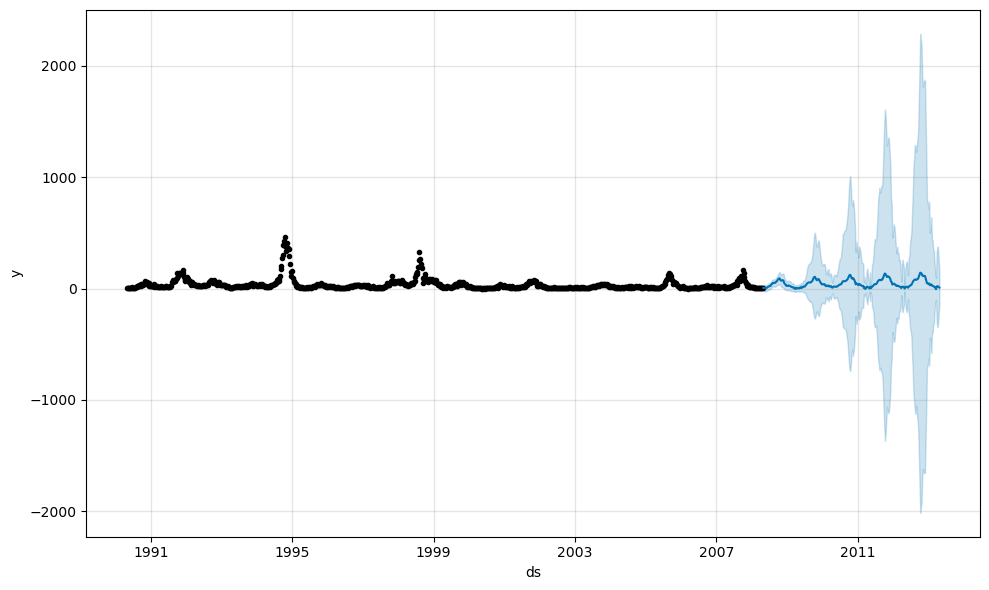

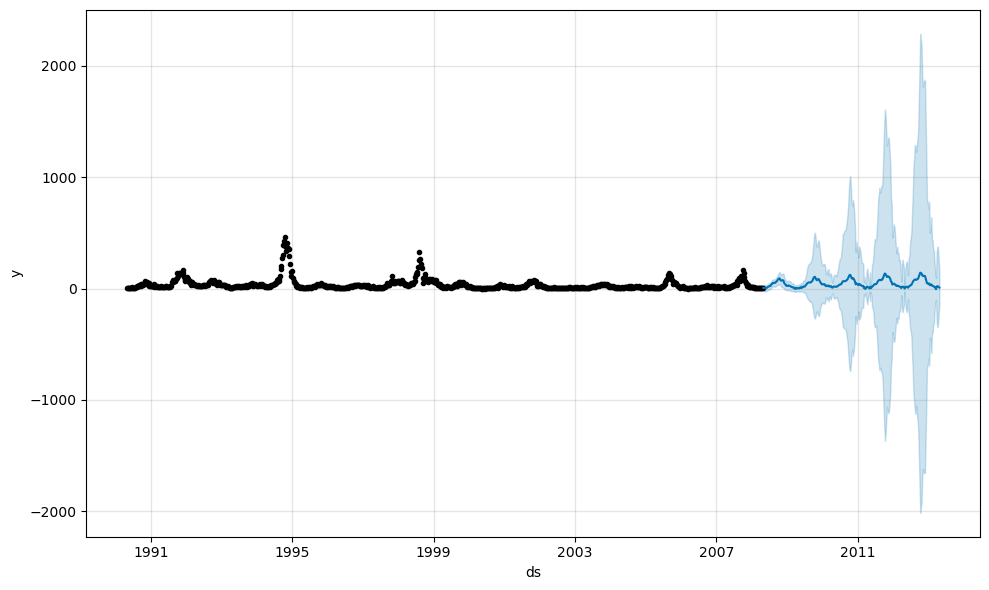

In [37]:
m.plot(forecast_sj)

In [38]:
iq_data = data[data['city'] == 'iq']

In [39]:
iq_data['ndvi_se'] = iq_data['ndvi_se'].fillna(method = 'ffill')
iq_data['ndvi_sw'] = iq_data['ndvi_sw'].fillna(method = 'ffill')
iq_data['ndvi_ne'] = iq_data['ndvi_ne'].fillna(method = 'ffill')
iq_data['ndvi_nw'] = iq_data['ndvi_nw'].fillna(method = 'ffill')

iq_data['reanalysis_air_temp_k'] = iq_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_avg_temp_k'] = iq_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_dew_point_temp_k'] =iq_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_max_air_temp_k'] = iq_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_min_air_temp_k'] = iq_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_specific_humidity_g_per_kg'] = iq_data['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
iq_data['station_min_temp_c'] = iq_data['station_min_temp_c'].fillna(method = 'ffill')


iq_data['avg_reanalysis'] = iq_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

iq_data['avg_ndvi'] = iq_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

<AxesSubplot:>

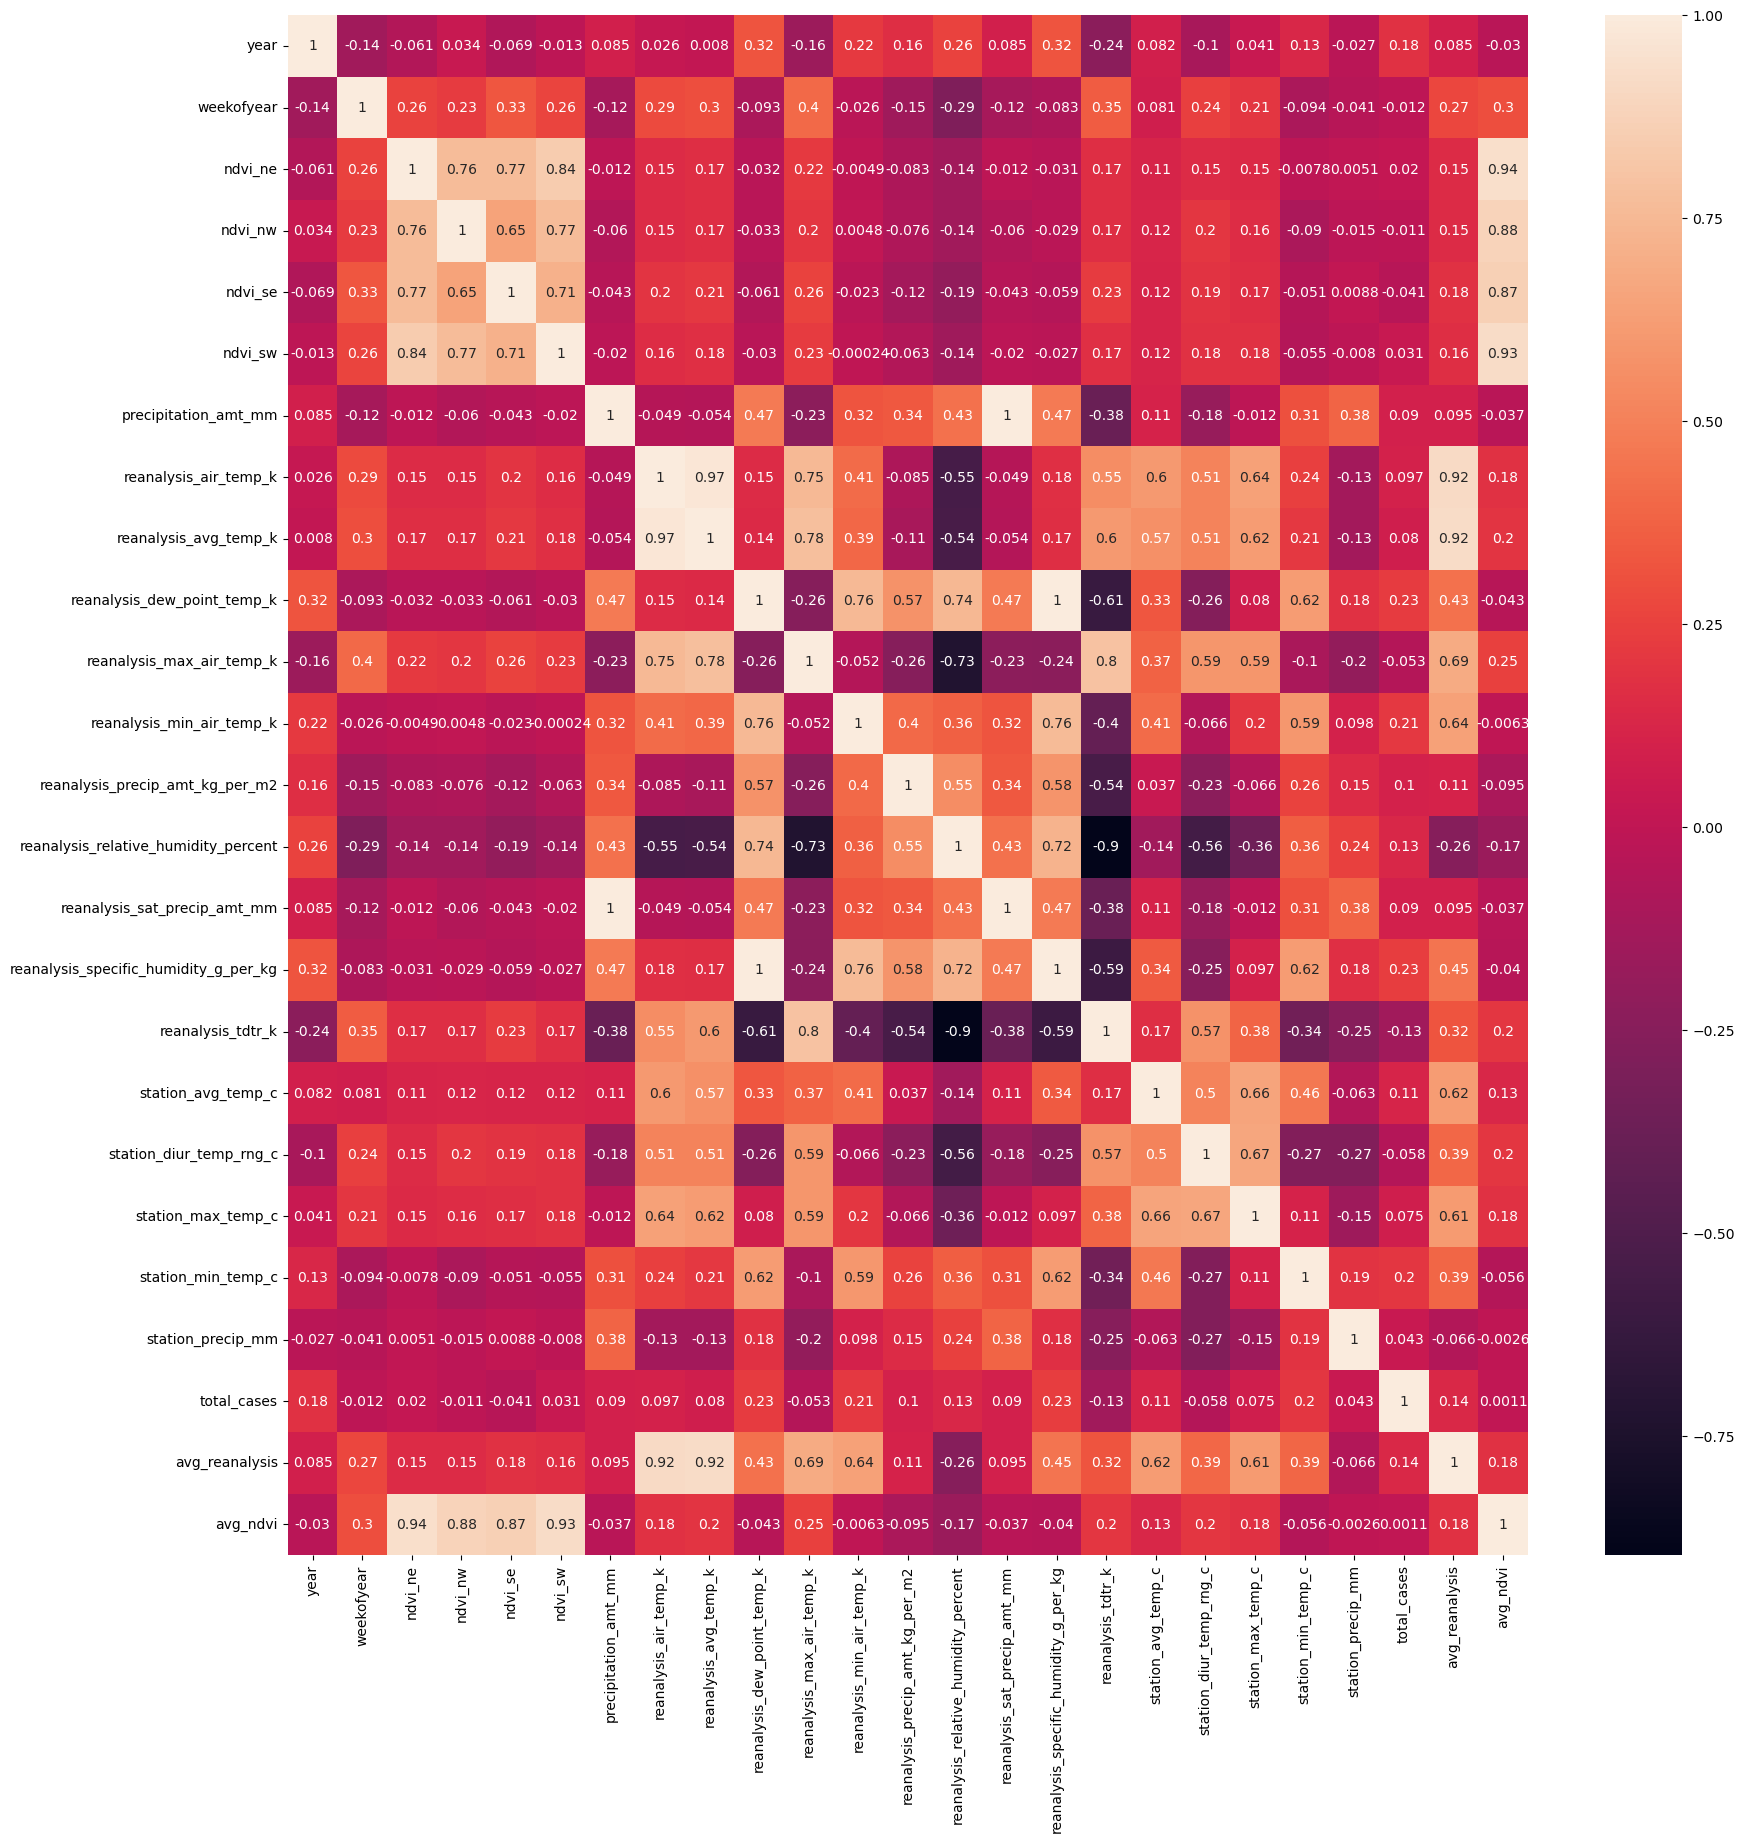

In [40]:
plt.figure(figsize=[20,20])
sns.heatmap(iq_data.corr(),annot=True)

In [41]:
iq_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [42]:
iq_data = iq_data[['week_start_date','total_cases','reanalysis_specific_humidity_g_per_kg','avg_ndvi',
                   'avg_reanalysis','station_min_temp_c']]

In [43]:
iq_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [44]:
test_df_iq = test_df_main[test_df_main['city']=='iq']
test_df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
260,iq,2010,26,2010-07-02,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,293.7,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
261,iq,2010,27,2010-07-09,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,292.2,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
262,iq,2010,28,2010-07-16,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,292.5,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
263,iq,2010,29,2010-07-23,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,289.3,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
264,iq,2010,30,2010-07-30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,290.5,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0


In [45]:
test_df_iq['ndvi_se'] = test_df_iq['ndvi_se'].fillna(method = 'ffill')
test_df_iq['ndvi_sw'] = test_df_iq['ndvi_sw'].fillna(method = 'ffill')
test_df_iq['ndvi_ne'] = test_df_iq['ndvi_ne'].fillna(method = 'ffill')
test_df_iq['ndvi_nw'] = test_df_iq['ndvi_nw'].fillna(method = 'ffill')

test_df_iq['reanalysis_air_temp_k'] = test_df_iq['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_avg_temp_k'] = test_df_iq['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_dew_point_temp_k'] =test_df_iq['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_max_air_temp_k'] = test_df_iq['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_min_air_temp_k'] = test_df_iq['reanalysis_min_air_temp_k'].fillna(method = 'ffill')


test_df_iq['avg_reanalysis'] = test_df_iq[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df_iq['avg_ndvi'] = test_df_iq[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [46]:
test_df_iq['reanalysis_specific_humidity_g_per_kg'] = test_df_iq['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
test_df_iq['station_min_temp_c'] = test_df_iq['station_min_temp_c'].fillna(method = 'ffill')


In [47]:
test_df_iq = test_df_iq[['week_start_date','avg_reanalysis','reanalysis_specific_humidity_g_per_kg','avg_ndvi','station_min_temp_c']]


In [48]:
test_df_iq.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df_iq.head()

,ds,avg_reanalysis,reanalysis_specific_humidity_g_per_kg,avg_ndvi,station_min_temp_c
260,2010-07-02,298.916286,17.654286,0.175407,21.5
261,2010-07-09,298.484000,16.320000,0.303885,21.2
262,2010-07-16,298.447429,18.030000,0.260786,21.6
263,2010-07-23,296.339429,15.394286,0.089129,14.2
264,2010-07-30,298.199143,15.468571,0.287946,16.9


In [49]:
# m_iq = Prophet()
# m_iq.add_regressor('avg_reanalysis')
# m_iq.add_regressor('avg_ndvi')
# m_iq.fit(iq_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast_iq = m_iq.predict(test_df_iq)
# forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [50]:
# forecast_iq.head()

In [51]:
# forecast_iq[forecast_iq['yhat'] == 0].count()

In [52]:
# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('avg_ndvi')
    m.add_regressor('reanalysis_specific_humidity_g_per_kg')
    m.add_regressor('station_min_temp_c')
    m.fit(iq_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='365.25 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model.add_regressor('avg_reanalysis')
auto_model.add_regressor('avg_ndvi')
auto_model.add_regressor('reanalysis_specific_humidity_g_per_kg')
auto_model.add_regressor('station_min_temp_c')
auto_model.fit(iq_data)

11:53:39 - cmdstanpy - INFO - Chain [1] start processing
11:53:39 - cmdstanpy - INFO - Chain [1] done processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:44 - cmdstanpy - INFO - Chain [1] start processing
11:53:45 - cmdstanpy - INFO - Chain [1] done processing
11:53:45 - cmdstanpy - INFO - Chain [1] done processing
11:53:45 - cmdstanpy - INFO - Chain [1] done processing
11:53:45 - cmdstanpy - INFO - Chain [1] done processing
11:53:45 - cmdstanpy - INFO - Chain [1] done processing
11:53:45 - cmdstanpy - INFO - Chain [1] done processing
11:53:45 - cmdstanpy - INFO - Chain [1] done processing
11:53:45 - cmdstanpy - INFO - Chain [1]

11:53:50 - cmdstanpy - INFO - Chain [1] start processing
11:53:50 - cmdstanpy - INFO - Chain [1] start processing
11:53:50 - cmdstanpy - INFO - Chain [1] done processing
11:53:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:53:50 - cmdstanpy - INFO - Chain [1] start processing
11:53:50 - cmdstanpy - INFO - Chain [1] start processing
11:53:50 - cmdstanpy - INFO - Chain [1] done processing
11:53:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:53:50 - cmdstanpy - INFO - Chain [1] start processing
11:53:50 - cmdstanpy - INFO - Chain [1] start processing
11:53:50 - cmdstanpy - INFO - Chain [1] done processing
11:53:50 - cmdstanpy - INFO - Chain [1] done processing
11:53:50 - cmdstanpy - INFO - Chain [1] start processing
11:53:50 - cmdstanpy - INFO - Chain [1] done processing
11:53:50 - cm

11:53:58 - cmdstanpy - INFO - Chain [1] done processing
11:53:58 - cmdstanpy - INFO - Chain [1] done processing
11:53:58 - cmdstanpy - INFO - Chain [1] done processing
11:53:58 - cmdstanpy - INFO - Chain [1] start processing
11:53:58 - cmdstanpy - INFO - Chain [1] done processing
11:53:58 - cmdstanpy - INFO - Chain [1] done processing
11:53:58 - cmdstanpy - INFO - Chain [1] start processing
11:53:58 - cmdstanpy - INFO - Chain [1] start processing
11:53:58 - cmdstanpy - INFO - Chain [1] done processing
11:53:59 - cmdstanpy - INFO - Chain [1] start processing
11:53:59 - cmdstanpy - INFO - Chain [1] start processing
11:53:59 - cmdstanpy - INFO - Chain [1] done processing
11:53:59 - cmdstanpy - INFO - Chain [1] start processing
11:53:59 - cmdstanpy - INFO - Chain [1] done processing
11:53:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:53:59 - cmdstanpy - INFO - Chain [1] done processing


11:54:15 - cmdstanpy - INFO - Chain [1] start processing
11:54:15 - cmdstanpy - INFO - Chain [1] done processing
11:54:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:54:15 - cmdstanpy - INFO - Chain [1] start processing
11:54:15 - cmdstanpy - INFO - Chain [1] done processing
11:54:15 - cmdstanpy - INFO - Chain [1] start processing
11:54:15 - cmdstanpy - INFO - Chain [1] done processing
11:54:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:54:15 - cmdstanpy - INFO - Chain [1] start processing
11:54:15 - cmdstanpy - INFO - Chain [1] done processing
11:54:15 - cmdstanpy - INFO - Chain [1] done processing
11:54:16 - cmdstanpy - INFO - Chain [1] done processing
11:54:16 - cmdstanpy - INFO - Chain [1] start processing
11:54:16 - cmdstanpy - INFO - Chain [1] done processing
11:54:16 - cmds

11:54:23 - cmdstanpy - INFO - Chain [1] start processing
11:54:23 - cmdstanpy - INFO - Chain [1] done processing
11:54:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:54:23 - cmdstanpy - INFO - Chain [1] start processing
11:54:23 - cmdstanpy - INFO - Chain [1] start processing
11:54:24 - cmdstanpy - INFO - Chain [1] done processing
11:54:24 - cmdstanpy - INFO - Chain [1] start processing
11:54:24 - cmdstanpy - INFO - Chain [1] done processing
11:54:24 - cmdstanpy - INFO - Chain [1] start processing
11:54:24 - cmdstanpy - INFO - Chain [1] done processing
11:54:24 - cmdstanpy - INFO - Chain [1] start processing
11:54:24 - cmdstanpy - INFO - Chain [1] done processing
11:54:24 - cmdstanpy - INFO - Chain [1] start processing
11:54:24 - cmdstanpy - INFO - Chain [1] start processing
11:54:24 - cmdstanpy - INFO - Chain [1] done processing
11:54:24 - cmdstanpy - INFO - Chain [1] done processin

11:54:33 - cmdstanpy - INFO - Chain [1] done processing
11:54:33 - cmdstanpy - INFO - Chain [1] done processing
11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] done processing
11:54:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] done processing
11:54:34 - cmdstanpy - INFO - Chain [1] done processing
11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] done processing
11:54:35 - cmdstanpy - INFO - Chain [1] done processing
11:54:35 - cmdstanpy - INFO - Chain [1] start processing
11:54:35 - cmdstanpy - INFO - Chain [1] start processin

11:54:51 - cmdstanpy - INFO - Chain [1] start processing
11:54:51 - cmdstanpy - INFO - Chain [1] start processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] start processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:54:52 - cmdstanpy - INFO - Chain [1] start processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] start processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - ERROR - Chain [1] error: error dur

11:54:58 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] done processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1] start processing
11:54:59 - cmdstanpy - INFO - Chain [1]

11:55:14 - cmdstanpy - INFO - Chain [1] done processing
11:55:15 - cmdstanpy - INFO - Chain [1] done processing
11:55:15 - cmdstanpy - INFO - Chain [1] done processing
11:55:15 - cmdstanpy - INFO - Chain [1] start processing
11:55:15 - cmdstanpy - INFO - Chain [1] done processing
11:55:15 - cmdstanpy - INFO - Chain [1] start processing
11:55:15 - cmdstanpy - INFO - Chain [1] done processing
11:55:15 - cmdstanpy - INFO - Chain [1] done processing
11:55:15 - cmdstanpy - INFO - Chain [1] start processing
11:55:16 - cmdstanpy - INFO - Chain [1] start processing
11:55:16 - cmdstanpy - INFO - Chain [1] done processing
11:55:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:16 - cmdstanpy - INFO - Chain [1] start processing
11:55:16 - cmdstanpy - INFO - Chain [1] start processing
11:55:16 - cmdstanpy - INFO - Chain [1] done processing
11:55:16 - cmdstanpy - ERROR - Chain [1] error: error du

11:55:22 - cmdstanpy - INFO - Chain [1] start processing
11:55:23 - cmdstanpy - INFO - Chain [1] done processing
11:55:23 - cmdstanpy - INFO - Chain [1] start processing
11:55:23 - cmdstanpy - INFO - Chain [1] done processing
11:55:23 - cmdstanpy - INFO - Chain [1] done processing
11:55:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:23 - cmdstanpy - INFO - Chain [1] start processing
11:55:23 - cmdstanpy - INFO - Chain [1] done processing
11:55:23 - cmdstanpy - INFO - Chain [1] start processing
11:55:23 - cmdstanpy - INFO - Chain [1] done processing
11:55:23 - cmdstanpy - INFO - Chain [1] start processing
11:55:23 - cmdstanpy - INFO - Chain [1] start processing
11:55:23 - cmdstanpy - INFO - Chain [1] done processing
11:55:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:23 - cmd

11:55:30 - cmdstanpy - INFO - Chain [1] done processing
11:55:30 - cmdstanpy - INFO - Chain [1] done processing
11:55:30 - cmdstanpy - INFO - Chain [1] start processing
11:55:31 - cmdstanpy - INFO - Chain [1] done processing
11:55:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:31 - cmdstanpy - INFO - Chain [1] start processing
11:55:31 - cmdstanpy - INFO - Chain [1] start processing
11:55:31 - cmdstanpy - INFO - Chain [1] done processing
11:55:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:31 - cmdstanpy - INFO - Chain [1] start processing
11:55:31 - cmdstanpy - INFO - Chain [1] start processing
11:55:31 - cmdstanpy - INFO - Chain [1] done processing
11:55:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

11:55:44 - cmdstanpy - INFO - Chain [1] done processing
11:55:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:44 - cmdstanpy - INFO - Chain [1] start processing
11:55:44 - cmdstanpy - INFO - Chain [1] start processing
11:55:44 - cmdstanpy - INFO - Chain [1] done processing
11:55:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:44 - cmdstanpy - INFO - Chain [1] start processing
11:55:45 - cmdstanpy - INFO - Chain [1] start processing
11:55:45 - cmdstanpy - INFO - Chain [1] done processing
11:55:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:45 - cmdstanpy - INFO - Chain [1] start processing
11:55:45 - cmdstanpy - INFO - Chain [1] done processing
11:55:45 - cmdstanpy - INFO -

11:55:51 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - INFO - Chain [1] start processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - INFO - Chain [1] start processing
11:55:52 - cmdstanpy - INFO - Chain [1] start processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - INFO - Chain [1] start processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:55:52 - cmdstanpy - INFO - Chain [1] start processing
11:55:52 - cmdstanpy - INFO - Chain [1] start processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing
11:55:52 - cmdstanpy - INFO - Chain [1] done processing


11:55:59 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:01 - cmdstanpy - INFO - Chain [1] done processing
11:56:01 - cmdstanpy - INFO - Chain [1] start processing
11:56:01 - cmdstanpy - INFO - Chain [1] start processing
11:56:01 - cmdstanpy - INFO - Chain [1]

11:56:14 - cmdstanpy - INFO - Chain [1] done processing
11:56:14 - cmdstanpy - INFO - Chain [1] start processing
11:56:14 - cmdstanpy - INFO - Chain [1] done processing
11:56:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:14 - cmdstanpy - INFO - Chain [1] start processing
11:56:14 - cmdstanpy - INFO - Chain [1] start processing
11:56:14 - cmdstanpy - INFO - Chain [1] done processing
11:56:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:14 - cmdstanpy - INFO - Chain [1] start processing
11:56:14 - cmdstanpy - INFO - Chain [1] start processing
11:56:14 - cmdstanpy - INFO - Chain [1] done processing
11:56:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:14 - cmdstanpy - INFO -

11:56:22 - cmdstanpy - INFO - Chain [1] done processing
11:56:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:22 - cmdstanpy - INFO - Chain [1] start processing
11:56:22 - cmdstanpy - INFO - Chain [1] start processing
11:56:22 - cmdstanpy - INFO - Chain [1] done processing
11:56:22 - cmdstanpy - INFO - Chain [1] done processing
11:56:22 - cmdstanpy - INFO - Chain [1] start processing
11:56:22 - cmdstanpy - INFO - Chain [1] done processing
11:56:22 - cmdstanpy - INFO - Chain [1] start processing
11:56:22 - cmdstanpy - INFO - Chain [1] start processing
11:56:22 - cmdstanpy - INFO - Chain [1] done processing
11:56:22 - cmdstanpy - INFO - Chain [1] start processing
11:56:22 - cmdstanpy - INFO - Chain [1] done processing
11:56:22 - cmdstanpy - INFO - Chain [1] done processing
11:56:23 - cmdstanpy - INFO - Chain [1] start processing
11:56:23 - cmdstanpy - INFO - Chain [1] done processing

11:56:36 - cmdstanpy - INFO - Chain [1] done processing
11:56:36 - cmdstanpy - INFO - Chain [1] done processing
11:56:36 - cmdstanpy - INFO - Chain [1] done processing
11:56:36 - cmdstanpy - INFO - Chain [1] done processing
11:56:37 - cmdstanpy - INFO - Chain [1] done processing
11:56:37 - cmdstanpy - INFO - Chain [1] done processing
11:56:37 - cmdstanpy - INFO - Chain [1] done processing
11:56:37 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] done processing
11:56:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:37 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] start processing

11:56:43 - cmdstanpy - INFO - Chain [1] start processing
11:56:43 - cmdstanpy - INFO - Chain [1] done processing
11:56:43 - cmdstanpy - INFO - Chain [1] start processing
11:56:44 - cmdstanpy - INFO - Chain [1] done processing
11:56:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:44 - cmdstanpy - INFO - Chain [1] start processing
11:56:44 - cmdstanpy - INFO - Chain [1] done processing
11:56:44 - cmdstanpy - INFO - Chain [1] start processing
11:56:44 - cmdstanpy - INFO - Chain [1] start processing
11:56:44 - cmdstanpy - INFO - Chain [1] done processing
11:56:44 - cmdstanpy - INFO - Chain [1] done processing
11:56:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:44 - cmdstanpy - INFO - Chain [1] start processing
11:56:44 - cmdstanpy - INFO - Chain [1] done processing
11:56:44 - cmd

11:56:52 - cmdstanpy - INFO - Chain [1] start processing
11:56:52 - cmdstanpy - INFO - Chain [1] done processing
11:56:52 - cmdstanpy - INFO - Chain [1] done processing
11:56:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:52 - cmdstanpy - INFO - Chain [1] start processing
11:56:52 - cmdstanpy - INFO - Chain [1] start processing
11:56:52 - cmdstanpy - INFO - Chain [1] done processing
11:56:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:52 - cmdstanpy - INFO - Chain [1] start processing
11:56:52 - cmdstanpy - INFO - Chain [1] start processing
11:56:52 - cmdstanpy - INFO - Chain [1] done processing
11:56:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:56:52 - cmdstanpy - INFO -

11:57:07 - cmdstanpy - INFO - Chain [1] start processing
11:57:07 - cmdstanpy - INFO - Chain [1] start processing
11:57:07 - cmdstanpy - INFO - Chain [1] done processing
11:57:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:57:07 - cmdstanpy - INFO - Chain [1] start processing
11:57:07 - cmdstanpy - INFO - Chain [1] done processing
11:57:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:57:07 - cmdstanpy - INFO - Chain [1] start processing
11:57:07 - cmdstanpy - INFO - Chain [1] done processing
11:57:07 - cmdstanpy - INFO - Chain [1] done processing
11:57:07 - cmdstanpy - INFO - Chain [1] done processing
11:57:07 - cmdstanpy - INFO - Chain [1] done processing
11:57:08 - cmdstanpy - INFO - Chain [1] start processing
11:57:08 - cmdstanpy - INFO - Chain [1] done processing
11:57:08 - cmds

11:57:13 - cmdstanpy - INFO - Chain [1] done processing
11:57:13 - cmdstanpy - INFO - Chain [1] start processing
11:57:13 - cmdstanpy - INFO - Chain [1] start processing
11:57:13 - cmdstanpy - INFO - Chain [1] done processing
11:57:13 - cmdstanpy - INFO - Chain [1] done processing
11:57:14 - cmdstanpy - INFO - Chain [1] start processing
11:57:14 - cmdstanpy - INFO - Chain [1] start processing
11:57:14 - cmdstanpy - INFO - Chain [1] done processing
11:57:14 - cmdstanpy - INFO - Chain [1] start processing
11:57:14 - cmdstanpy - INFO - Chain [1] done processing
11:57:14 - cmdstanpy - INFO - Chain [1] done processing
11:57:14 - cmdstanpy - INFO - Chain [1] done processing
11:57:14 - cmdstanpy - INFO - Chain [1] done processing
11:57:15 - cmdstanpy - INFO - Chain [1] start processing
11:57:15 - cmdstanpy - INFO - Chain [1] done processing
11:57:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.


11:57:22 - cmdstanpy - INFO - Chain [1] done processing
11:57:22 - cmdstanpy - INFO - Chain [1] done processing
11:57:22 - cmdstanpy - INFO - Chain [1] start processing
11:57:22 - cmdstanpy - INFO - Chain [1] done processing
11:57:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
11:57:22 - cmdstanpy - INFO - Chain [1] start processing
11:57:22 - cmdstanpy - INFO - Chain [1] done processing
11:57:23 - cmdstanpy - INFO - Chain [1] start processing
11:57:23 - cmdstanpy - INFO - Chain [1] start processing
11:57:23 - cmdstanpy - INFO - Chain [1] done processing
11:57:23 - cmdstanpy - INFO - Chain [1] done processing
11:57:23 - cmdstanpy - INFO - Chain [1] done processing
11:57:23 - cmdstanpy - INFO - Chain [1] start processing
11:57:23 - cmdstanpy - INFO - Chain [1] start processing
11:57:23 - cmdstanpy - INFO - Chain [1] done processing
11:57:23 - cmdstanpy - INFO - Chain [1] done processing


11:57:39 - cmdstanpy - INFO - Chain [1] done processing
11:57:39 - cmdstanpy - INFO - Chain [1] done processing
11:57:39 - cmdstanpy - INFO - Chain [1] start processing
11:57:39 - cmdstanpy - INFO - Chain [1] start processing
11:57:40 - cmdstanpy - INFO - Chain [1] start processing
11:57:40 - cmdstanpy - INFO - Chain [1] done processing
11:57:40 - cmdstanpy - INFO - Chain [1] start processing
11:57:40 - cmdstanpy - INFO - Chain [1] done processing
11:57:40 - cmdstanpy - INFO - Chain [1] done processing
11:57:40 - cmdstanpy - INFO - Chain [1] start processing
11:57:40 - cmdstanpy - INFO - Chain [1] done processing
11:57:40 - cmdstanpy - INFO - Chain [1] start processing
11:57:40 - cmdstanpy - INFO - Chain [1] done processing
11:57:40 - cmdstanpy - INFO - Chain [1] done processing
11:57:40 - cmdstanpy - INFO - Chain [1] start processing
11:57:40 - cmdstanpy - INFO - Chain [1] start processing
11:57:40 - cmdstanpy - INFO - Chain [1] done processing
11:57:40 - cmdstanpy - INFO - Chain [1] 

11:57:54 - cmdstanpy - INFO - Chain [1] start processing
11:57:54 - cmdstanpy - INFO - Chain [1] done processing
11:57:54 - cmdstanpy - INFO - Chain [1] done processing
11:57:54 - cmdstanpy - INFO - Chain [1] done processing
11:57:54 - cmdstanpy - INFO - Chain [1] done processing
11:57:54 - cmdstanpy - INFO - Chain [1] start processing
11:57:54 - cmdstanpy - INFO - Chain [1] done processing
11:57:54 - cmdstanpy - INFO - Chain [1] start processing
11:57:54 - cmdstanpy - INFO - Chain [1] start processing
11:57:55 - cmdstanpy - INFO - Chain [1] done processing
11:57:55 - cmdstanpy - INFO - Chain [1] done processing
11:57:55 - cmdstanpy - INFO - Chain [1] start processing
11:57:55 - cmdstanpy - INFO - Chain [1] done processing
11:57:55 - cmdstanpy - INFO - Chain [1] done processing
11:57:55 - cmdstanpy - INFO - Chain [1] start processing
11:57:55 - cmdstanpy - INFO - Chain [1] start processing
11:57:55 - cmdstanpy - INFO - Chain [1] done processing
11:57:55 - cmdstanpy - INFO - Chain [1] d

11:58:02 - cmdstanpy - INFO - Chain [1] done processing
11:58:02 - cmdstanpy - INFO - Chain [1] start processing
11:58:02 - cmdstanpy - INFO - Chain [1] start processing
11:58:02 - cmdstanpy - INFO - Chain [1] done processing
11:58:02 - cmdstanpy - INFO - Chain [1] done processing
11:58:02 - cmdstanpy - INFO - Chain [1] start processing
11:58:03 - cmdstanpy - INFO - Chain [1] start processing
11:58:03 - cmdstanpy - INFO - Chain [1] start processing
11:58:03 - cmdstanpy - INFO - Chain [1] done processing
11:58:03 - cmdstanpy - INFO - Chain [1] start processing
11:58:03 - cmdstanpy - INFO - Chain [1] start processing
11:58:03 - cmdstanpy - INFO - Chain [1] start processing
11:58:03 - cmdstanpy - INFO - Chain [1] done processing
11:58:03 - cmdstanpy - INFO - Chain [1] done processing
11:58:03 - cmdstanpy - INFO - Chain [1] done processing
11:58:03 - cmdstanpy - INFO - Chain [1] done processing
11:58:03 - cmdstanpy - INFO - Chain [1] done processing
11:58:03 - cmdstanpy - INFO - Chain [1] 

11:58:18 - cmdstanpy - INFO - Chain [1] done processing
11:58:18 - cmdstanpy - INFO - Chain [1] start processing
11:58:18 - cmdstanpy - INFO - Chain [1] done processing
11:58:18 - cmdstanpy - INFO - Chain [1] start processing
11:58:18 - cmdstanpy - INFO - Chain [1] done processing
11:58:18 - cmdstanpy - INFO - Chain [1] start processing
11:58:19 - cmdstanpy - INFO - Chain [1] done processing
11:58:19 - cmdstanpy - INFO - Chain [1] start processing
11:58:19 - cmdstanpy - INFO - Chain [1] done processing
11:58:19 - cmdstanpy - INFO - Chain [1] start processing
11:58:19 - cmdstanpy - INFO - Chain [1] start processing
11:58:19 - cmdstanpy - INFO - Chain [1] start processing
11:58:19 - cmdstanpy - INFO - Chain [1] start processing
11:58:19 - cmdstanpy - INFO - Chain [1] done processing
11:58:19 - cmdstanpy - INFO - Chain [1] done processing
11:58:19 - cmdstanpy - INFO - Chain [1] done processing
11:58:19 - cmdstanpy - INFO - Chain [1] done processing
11:58:19 - cmdstanpy - INFO - Chain [1] 

11:58:34 - cmdstanpy - INFO - Chain [1] done processing
11:58:34 - cmdstanpy - INFO - Chain [1] start processing
11:58:34 - cmdstanpy - INFO - Chain [1] done processing
11:58:34 - cmdstanpy - INFO - Chain [1] start processing
11:58:34 - cmdstanpy - INFO - Chain [1] start processing
11:58:34 - cmdstanpy - INFO - Chain [1] done processing
11:58:34 - cmdstanpy - INFO - Chain [1] done processing
11:58:34 - cmdstanpy - INFO - Chain [1] start processing
11:58:34 - cmdstanpy - INFO - Chain [1] done processing
11:58:35 - cmdstanpy - INFO - Chain [1] start processing
11:58:35 - cmdstanpy - INFO - Chain [1] start processing
11:58:35 - cmdstanpy - INFO - Chain [1] done processing
11:58:35 - cmdstanpy - INFO - Chain [1] done processing
11:58:35 - cmdstanpy - INFO - Chain [1] start processing
11:58:35 - cmdstanpy - INFO - Chain [1] start processing
11:58:35 - cmdstanpy - INFO - Chain [1] start processing
11:58:35 - cmdstanpy - INFO - Chain [1] done processing
11:58:35 - cmdstanpy - INFO - Chain [1]

11:58:42 - cmdstanpy - INFO - Chain [1] start processing
11:58:42 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1]

11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] start processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:57 - cmdstanpy - INFO - Chain [1] done processing
11:58:58 - cmdstanpy - INFO - Chain [1] start processing
11:58:58 - cmdstanpy - INFO - Chain [1]

11:59:11 - cmdstanpy - INFO - Chain [1] done processing
11:59:11 - cmdstanpy - INFO - Chain [1] start processing
11:59:11 - cmdstanpy - INFO - Chain [1] done processing
11:59:11 - cmdstanpy - INFO - Chain [1] start processing
11:59:11 - cmdstanpy - INFO - Chain [1] start processing
11:59:11 - cmdstanpy - INFO - Chain [1] done processing
11:59:11 - cmdstanpy - INFO - Chain [1] done processing
11:59:11 - cmdstanpy - INFO - Chain [1] done processing
11:59:11 - cmdstanpy - INFO - Chain [1] start processing
11:59:12 - cmdstanpy - INFO - Chain [1] done processing
11:59:12 - cmdstanpy - INFO - Chain [1] start processing
11:59:12 - cmdstanpy - INFO - Chain [1] done processing
11:59:12 - cmdstanpy - INFO - Chain [1] start processing
11:59:12 - cmdstanpy - INFO - Chain [1] start processing
11:59:12 - cmdstanpy - INFO - Chain [1] done processing
11:59:12 - cmdstanpy - INFO - Chain [1] start processing
11:59:12 - cmdstanpy - INFO - Chain [1] done processing
11:59:12 - cmdstanpy - INFO - Chain [1] 

11:59:19 - cmdstanpy - INFO - Chain [1] done processing
11:59:19 - cmdstanpy - INFO - Chain [1] done processing
11:59:19 - cmdstanpy - INFO - Chain [1] done processing
11:59:19 - cmdstanpy - INFO - Chain [1] start processing
11:59:19 - cmdstanpy - INFO - Chain [1] start processing
11:59:19 - cmdstanpy - INFO - Chain [1] start processing
11:59:19 - cmdstanpy - INFO - Chain [1] start processing
11:59:19 - cmdstanpy - INFO - Chain [1] done processing
11:59:19 - cmdstanpy - INFO - Chain [1] done processing
11:59:19 - cmdstanpy - INFO - Chain [1] done processing
11:59:19 - cmdstanpy - INFO - Chain [1] done processing
11:59:19 - cmdstanpy - INFO - Chain [1] start processing
11:59:20 - cmdstanpy - INFO - Chain [1] start processing
11:59:20 - cmdstanpy - INFO - Chain [1] done processing
11:59:20 - cmdstanpy - INFO - Chain [1] start processing
11:59:20 - cmdstanpy - INFO - Chain [1] done processing
11:59:20 - cmdstanpy - INFO - Chain [1] done processing
11:59:20 - cmdstanpy - INFO - Chain [1] s

11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:33 - cmdstanpy - INFO - Chain [1] start processing
11:59:33 - cmdstanpy - INFO - Chain [1] done processing
11:59:34 - cmdstanpy - INFO - Chain [1] start processing
11:59:34 - cmdstanpy - INFO - Chain [1] done processing
11:59:34 - cmdstanpy - INFO - Chain [1] start processing
11:59:34 - cmdstanpy - INFO - Chain [1] done processing
11:59:34 - cmdstanpy - INFO - Chain [1]

11:59:47 - cmdstanpy - INFO - Chain [1] start processing
11:59:47 - cmdstanpy - INFO - Chain [1] done processing
11:59:47 - cmdstanpy - INFO - Chain [1] start processing
11:59:47 - cmdstanpy - INFO - Chain [1] start processing
11:59:47 - cmdstanpy - INFO - Chain [1] done processing
11:59:47 - cmdstanpy - INFO - Chain [1] done processing
11:59:47 - cmdstanpy - INFO - Chain [1] done processing
11:59:48 - cmdstanpy - INFO - Chain [1] start processing
11:59:48 - cmdstanpy - INFO - Chain [1] done processing
11:59:48 - cmdstanpy - INFO - Chain [1] done processing
11:59:48 - cmdstanpy - INFO - Chain [1] start processing
11:59:48 - cmdstanpy - INFO - Chain [1] start processing
11:59:48 - cmdstanpy - INFO - Chain [1] done processing
11:59:48 - cmdstanpy - INFO - Chain [1] start processing
11:59:48 - cmdstanpy - INFO - Chain [1] done processing
11:59:48 - cmdstanpy - INFO - Chain [1] done processing
11:59:48 - cmdstanpy - INFO - Chain [1] done processing
11:59:48 - cmdstanpy - INFO - Chain [1] d

11:59:55 - cmdstanpy - INFO - Chain [1] start processing
11:59:55 - cmdstanpy - INFO - Chain [1] done processing
11:59:55 - cmdstanpy - INFO - Chain [1] start processing
11:59:55 - cmdstanpy - INFO - Chain [1] start processing
11:59:55 - cmdstanpy - INFO - Chain [1] start processing
11:59:55 - cmdstanpy - INFO - Chain [1] done processing
11:59:55 - cmdstanpy - INFO - Chain [1] start processing
11:59:55 - cmdstanpy - INFO - Chain [1] done processing
11:59:55 - cmdstanpy - INFO - Chain [1] done processing
11:59:55 - cmdstanpy - INFO - Chain [1] done processing
11:59:55 - cmdstanpy - INFO - Chain [1] done processing
11:59:55 - cmdstanpy - INFO - Chain [1] done processing
11:59:56 - cmdstanpy - INFO - Chain [1] start processing
11:59:56 - cmdstanpy - INFO - Chain [1] start processing
11:59:56 - cmdstanpy - INFO - Chain [1] done processing
11:59:56 - cmdstanpy - INFO - Chain [1] start processing
11:59:56 - cmdstanpy - INFO - Chain [1] start processing
11:59:56 - cmdstanpy - INFO - Chain [1]

12:00:10 - cmdstanpy - INFO - Chain [1] done processing
12:00:10 - cmdstanpy - INFO - Chain [1] start processing
12:00:10 - cmdstanpy - INFO - Chain [1] start processing
12:00:10 - cmdstanpy - INFO - Chain [1] start processing
12:00:10 - cmdstanpy - INFO - Chain [1] start processing
12:00:10 - cmdstanpy - INFO - Chain [1] done processing
12:00:10 - cmdstanpy - INFO - Chain [1] done processing
12:00:11 - cmdstanpy - INFO - Chain [1] done processing
12:00:11 - cmdstanpy - INFO - Chain [1] done processing
12:00:11 - cmdstanpy - INFO - Chain [1] done processing
12:00:11 - cmdstanpy - INFO - Chain [1] start processing
12:00:11 - cmdstanpy - INFO - Chain [1] start processing
12:00:11 - cmdstanpy - INFO - Chain [1] start processing
12:00:11 - cmdstanpy - INFO - Chain [1] done processing
12:00:11 - cmdstanpy - INFO - Chain [1] start processing
12:00:11 - cmdstanpy - INFO - Chain [1] done processing
12:00:11 - cmdstanpy - INFO - Chain [1] done processing
12:00:11 - cmdstanpy - INFO - Chain [1] 

12:00:27 - cmdstanpy - INFO - Chain [1] start processing
12:00:27 - cmdstanpy - INFO - Chain [1] done processing
12:00:27 - cmdstanpy - INFO - Chain [1] start processing
12:00:27 - cmdstanpy - INFO - Chain [1] done processing
12:00:27 - cmdstanpy - INFO - Chain [1] done processing
12:00:27 - cmdstanpy - INFO - Chain [1] start processing
12:00:27 - cmdstanpy - INFO - Chain [1] done processing
12:00:27 - cmdstanpy - INFO - Chain [1] done processing
12:00:27 - cmdstanpy - INFO - Chain [1] start processing
12:00:28 - cmdstanpy - INFO - Chain [1] done processing
12:00:28 - cmdstanpy - INFO - Chain [1] start processing
12:00:28 - cmdstanpy - INFO - Chain [1] done processing
12:00:28 - cmdstanpy - INFO - Chain [1] done processing
12:00:28 - cmdstanpy - INFO - Chain [1] start processing
12:00:28 - cmdstanpy - INFO - Chain [1] done processing
12:00:28 - cmdstanpy - INFO - Chain [1] start processing
12:00:28 - cmdstanpy - INFO - Chain [1] done processing
12:00:28 - cmdstanpy - INFO - Chain [1] d

12:00:36 - cmdstanpy - INFO - Chain [1] done processing
12:00:36 - cmdstanpy - INFO - Chain [1] done processing
12:00:36 - cmdstanpy - INFO - Chain [1] done processing
12:00:36 - cmdstanpy - INFO - Chain [1] done processing
12:00:36 - cmdstanpy - INFO - Chain [1] start processing
12:00:36 - cmdstanpy - INFO - Chain [1] start processing
12:00:36 - cmdstanpy - INFO - Chain [1] start processing
12:00:36 - cmdstanpy - INFO - Chain [1] start processing
12:00:36 - cmdstanpy - INFO - Chain [1] done processing
12:00:36 - cmdstanpy - INFO - Chain [1] done processing
12:00:36 - cmdstanpy - INFO - Chain [1] start processing
12:00:36 - cmdstanpy - INFO - Chain [1] start processing
12:00:36 - cmdstanpy - INFO - Chain [1] start processing
12:00:37 - cmdstanpy - INFO - Chain [1] done processing
12:00:37 - cmdstanpy - INFO - Chain [1] done processing
12:00:37 - cmdstanpy - INFO - Chain [1] start processing
12:00:37 - cmdstanpy - INFO - Chain [1] done processing
12:00:37 - cmdstanpy - INFO - Chain [1] 

12:00:52 - cmdstanpy - INFO - Chain [1] done processing
12:00:52 - cmdstanpy - INFO - Chain [1] start processing
12:00:52 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1]

12:01:09 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:10 - cmdstanpy - INFO - Chain [1] done processing
12:01:10 - cmdstanpy - INFO - Chain [1] d

12:01:19 - cmdstanpy - INFO - Chain [1] start processing
12:01:19 - cmdstanpy - INFO - Chain [1] start processing
12:01:19 - cmdstanpy - INFO - Chain [1] start processing
12:01:19 - cmdstanpy - INFO - Chain [1] done processing
12:01:19 - cmdstanpy - INFO - Chain [1] done processing
12:01:19 - cmdstanpy - INFO - Chain [1] start processing
12:01:20 - cmdstanpy - INFO - Chain [1] start processing
12:01:20 - cmdstanpy - INFO - Chain [1] start processing
12:01:20 - cmdstanpy - INFO - Chain [1] done processing
12:01:20 - cmdstanpy - INFO - Chain [1] done processing
12:01:20 - cmdstanpy - INFO - Chain [1] start processing
12:01:20 - cmdstanpy - INFO - Chain [1] done processing
12:01:20 - cmdstanpy - INFO - Chain [1] done processing
12:01:20 - cmdstanpy - INFO - Chain [1] done processing
12:01:20 - cmdstanpy - INFO - Chain [1] done processing
12:01:20 - cmdstanpy - INFO - Chain [1] start processing
12:01:20 - cmdstanpy - INFO - Chain [1] start processing
12:01:20 - cmdstanpy - INFO - Chain [1]

12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] done processing
12:01:36 - cmdstanpy - INFO - Chain [1] done processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] done processing
12:01:36 - cmdstanpy - INFO - Chain [1] done processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] done processing
12:01:37 - cmdstanpy - INFO - Chain [1] done processing
12:01:37 - cmdstanpy - INFO - Chain [1] done processing
12:01:37 - cmdstanpy - INFO - Chain [1] done processing
12:01:37 - cmdstanpy - INFO - Chain [1] start processing
12:01:37 - cmdstanpy - INFO - Chain [1]

12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:54 - cmdstanpy - INFO - Chain [1] start processing
12:01:54 - cmdstanpy - INFO - Chain [1] done processing
12:01:54 - cmdstanpy - INFO - Chain [1] start processing
12:01:54 - cmdstanpy - INFO - Chain [1] done processing
12:01:54 - cmdstanpy - INFO - Chain [1] 

12:02:02 - cmdstanpy - INFO - Chain [1] done processing
12:02:02 - cmdstanpy - INFO - Chain [1] start processing
12:02:02 - cmdstanpy - INFO - Chain [1] done processing
12:02:02 - cmdstanpy - INFO - Chain [1] start processing
12:02:03 - cmdstanpy - INFO - Chain [1] start processing
12:02:03 - cmdstanpy - INFO - Chain [1] done processing
12:02:03 - cmdstanpy - INFO - Chain [1] done processing
12:02:03 - cmdstanpy - INFO - Chain [1] start processing
12:02:03 - cmdstanpy - INFO - Chain [1] start processing
12:02:03 - cmdstanpy - INFO - Chain [1] done processing
12:02:03 - cmdstanpy - INFO - Chain [1] start processing
12:02:03 - cmdstanpy - INFO - Chain [1] done processing
12:02:03 - cmdstanpy - INFO - Chain [1] done processing
12:02:03 - cmdstanpy - INFO - Chain [1] done processing
12:02:03 - cmdstanpy - INFO - Chain [1] start processing
12:02:03 - cmdstanpy - INFO - Chain [1] done processing
12:02:03 - cmdstanpy - INFO - Chain [1] start processing
12:02:03 - cmdstanpy - INFO - Chain [1] 

12:02:19 - cmdstanpy - INFO - Chain [1] start processing
12:02:19 - cmdstanpy - INFO - Chain [1] start processing
12:02:19 - cmdstanpy - INFO - Chain [1] done processing
12:02:19 - cmdstanpy - INFO - Chain [1] done processing
12:02:19 - cmdstanpy - INFO - Chain [1] start processing
12:02:19 - cmdstanpy - INFO - Chain [1] done processing
12:02:19 - cmdstanpy - INFO - Chain [1] start processing
12:02:19 - cmdstanpy - INFO - Chain [1] done processing
12:02:19 - cmdstanpy - INFO - Chain [1] start processing
12:02:20 - cmdstanpy - INFO - Chain [1] start processing
12:02:20 - cmdstanpy - INFO - Chain [1] start processing
12:02:20 - cmdstanpy - INFO - Chain [1] start processing
12:02:20 - cmdstanpy - INFO - Chain [1] done processing
12:02:20 - cmdstanpy - INFO - Chain [1] done processing
12:02:20 - cmdstanpy - INFO - Chain [1] done processing
12:02:20 - cmdstanpy - INFO - Chain [1] done processing
12:02:20 - cmdstanpy - INFO - Chain [1] start processing
12:02:20 - cmdstanpy - INFO - Chain [1]

12:02:37 - cmdstanpy - INFO - Chain [1] done processing
12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing
12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing
12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing
12:02:38 - cmdstanpy - INFO - Chain [1] start processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing
12:02:38 - cmdstanpy - INFO - Chain [1] start processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing
12:02:38 - cmdstanpy - INFO - Chain [1] 

12:02:47 - cmdstanpy - INFO - Chain [1] start processing
12:02:47 - cmdstanpy - INFO - Chain [1] start processing
12:02:47 - cmdstanpy - INFO - Chain [1] start processing
12:02:47 - cmdstanpy - INFO - Chain [1] start processing
12:02:47 - cmdstanpy - INFO - Chain [1] done processing
12:02:47 - cmdstanpy - INFO - Chain [1] done processing
12:02:47 - cmdstanpy - INFO - Chain [1] done processing
12:02:48 - cmdstanpy - INFO - Chain [1] done processing
12:02:48 - cmdstanpy - INFO - Chain [1] done processing
12:02:48 - cmdstanpy - INFO - Chain [1] done processing
12:02:48 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1] done processing
12:02:48 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1

In [53]:
forecast_iq = auto_model.predict(test_df_iq)
forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
141,2013-03-19,5.087630,-7.795619,17.496711
142,2013-03-26,4.460350,-8.190856,17.304111
143,2013-04-02,4.737946,-7.597272,16.078749
144,2013-04-09,3.755431,-9.179657,15.787997
145,2013-04-16,3.020877,-8.703124,15.603891
146,2013-04-23,3.519736,-7.992300,16.323872
147,2013-04-30,0.016180,-12.437192,11.399866
148,2013-05-07,3.193332,-9.197488,15.758676
149,2013-05-14,3.462596,-8.665714,15.611832
150,2013-05-21,2.825550,-9.886472,14.966307


In [54]:
forecast_sj.to_csv('forecast_sj_365_4_feat_ndvi.csv')
forecast_iq.to_csv('forecast_iq_365_4_feat_ndvi.csv')

In [14]:
# sj_data.info()